# Insurance Claim Prediction

### Problem Statement: 

Health insurance providers face a critical challenge: **accurately estimating claim amounts** for individual customers. These predictions directly influence premium pricing, risk management, and financial planning. A misjudged estimate can lead to underpricing (financial losses) or overpricing (customer churn), making precision essential.

This project leverages a structured dataset containing customer health and lifestyle attributes—such as **age, BMI, smoking status, and medical history**—to build predictive models that estimate the **expected insurance claim cost**.

#### Predictive Objective:
- **Forecast individual claim amounts** using features like age, BMI, smoking status, number of dependents, and pre-existing health conditions.

#### Business Goal:
By modeling the relationship between personal health factors and claim costs, insurers can:
- Set fair and personalized premiums
- Improve underwriting accuracy
- Automate risk assessment
- Enhance customer segmentation and retention

#### Key Challenges:
- **Encoding categorical variables** (e.g., smoker status, region) for compatibility with ML algorithms.
- **Handling missing or inconsistent health records**, which may skew predictions.
- **Scaling numerical features** like age and BMI to ensure model stability and convergence.
- **Avoiding bias** in predictions, especially for sensitive attributes like age or smoking status.

#### Impact:
A well-trained model can serve as a decision-support tool for insurance companies—enabling **data-driven pricing**, **automated claim forecasting**, and **more equitable coverage policies**. It also opens doors for real-time premium adjustments and smarter customer onboarding.


## Importing the Libraries

In [51]:
#Loading necessaries packages
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Set pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.width', 1000)  # Adjust the width of the display

# Configure matplotlib settings
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size
plt.rcParams['axes.grid'] = True  # Enable grid by default

# Set seaborn style
sns.set(style="whitegrid")

# Optional: Set numpy display options
np.set_printoptions(threshold=np.inf)  # Display entire numpy arrays

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


## Importing the dataset

In [ ]:
health = pd.read_csv("data/health_insurance.csv")

In [53]:
# Display the first 15 rows of the dataframe to get an overview of the data
health.head(15)

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker          city  bloodpressure  diabetes  regular_ex      job_title    claim
0   60.0    male      64  24.3           NoDisease                 1       0       NewYork             72         0           0          Actor  13112.6
1   49.0  female      75  22.6           NoDisease                 1       0        Boston             78         1           1       Engineer   9567.0
2   32.0  female      64  17.8            Epilepsy                 2       1   Phildelphia             88         1           1    Academician  32734.2
3   61.0  female      53  36.4           NoDisease                 1       1     Pittsburg             72         1           0           Chef  48517.6
4   19.0  female      50  20.6           NoDisease                 0       0       Buffalo             82         1           0     HomeMakers   1731.7
5   42.0  female      89  37.9           NoDisease                 0       0  AtlanticCity             78         0           0         Dancer   6474.0
6   18.0    male      59  23.8           NoDisease                 0       0      Portland             64         0           0         Singer   1705.6
7   21.0    male      52  26.8           NoDisease                 0       0     Cambridge             74         1           0          Actor   1534.3
8   63.0    male      55   NaN           NoDisease                 0       0      Hartford             70         1           0         Dancer  13390.6
9   40.0  female      69  29.6           NoDisease                 0       0   Springfield             64         1           1  DataScientist   5910.9
10  51.0  female      50  33.0          EyeDisease                 0       1      Syracuse              0         1           0         Police  44400.4
11  59.0  female      68  36.5           NoDisease                 1       0     Baltimore             70         1           1     HomeMakers  28287.9
12  19.0    male      45  24.6           NoDisease                 1       0          York              0         0           1        Student   1837.2
13  21.0  female      53  35.7           NoDisease                 0       0       Trenton             62         1           0         Singer   2404.7
14  27.0    male      53  18.9           NoDisease                 3       0       Warwick             90         1           0         Doctor   4827.9

## About Dataset

### Data Definition
The dataset has 13 columns and 15000 features with values as follows:
- age : Age of the policyholder (Numeric)
- sex: Gender of policyholder (Categoric)
- weight: Weight of the policyholder (Numeric)
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
- no_of_dependents: Number of dependent persons on the policyholder (Numeric)
- smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
-  claim: The amount claimed by the policyholder (Numeric)

- bloodpressure: Bloodpressure reading of policyholder (Numeric)
- diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
- regular_ex: A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)
- job_title: Job profile of the policyholder (Categoric)
- city: The city in which the policyholder resides (Categoric)
- hereditary_diseases: A policyholder suffering from a hereditary diseases or not (Categoric)

## **Initial Data Inspection**

In [54]:
# Display the shape of the dataframe to understand its dimensions
print("\nShape of the dataset (number of rows and columns):", health.shape)


Shape of the dataset (number of rows and columns): (15000, 13)


In [55]:
int(health.duplicated().sum())

1096

In [56]:
# Display summary information of the dataset
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [57]:
# Check for missing values
health.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

### **Observations**:

- Shape of the Test Dataset:  
- Number of Rows (Data points): 15000  
- Number of Columns (Features):  13 

> **During the data preprocessing stage, it was confirmed that the dataset contains missing Values and duplicate values in it.**
- Missing Values: The dataset has 396 missing values in age column and 956 missing values in bmi, and the rest of the features has 0 missing values.  
- Duplicate values: There are 1096 set of duplicated values in this dataset.

**Target Variable**:  
- The target variable is claim feature,which is a Numerical feature representing the amount claimed by an individual.
- This is a regression problem, where the goal is to predict the expected insurance claim amount based on personal, lifestyle, and health-related attributes. The features are: 
1. sex
2. weight
3. bmi
4. hereditary_diseases
5. no_of_dependents
6. smoker
7. city
8. bloodpressure
9. diabetes
10. regular_ex
11. job_title

## **Data Cleaning**

### Removing the **Duplicate values**

In [58]:
health = health.drop_duplicates()

In [59]:
int(health.duplicated().sum())

0

In [60]:
# Display the shape of the dataframe to understand its dimensions after dropping duplicate values
print("The shape of the dataset after dropping Duplicate values:", health.shape) 

The shape of the dataset after dropping Duplicate values: (13904, 13)


### Checking the both the Age and bmi columns

In [61]:
health.age.value_counts()

age
18.0    699
19.0    616
21.0    341
50.0    338
51.0    327
54.0    320
42.0    319
52.0    317
34.0    313
56.0    313
22.0    309
47.0    304
59.0    302
45.0    302
27.0    299
24.0    299
32.0    298
28.0    298
33.0    292
40.0    292
53.0    289
30.0    289
46.0    288
41.0    287
35.0    286
55.0    285
23.0    281
48.0    280
43.0    279
44.0    269
31.0    267
36.0    267
49.0    265
20.0    261
37.0    257
26.0    257
25.0    253
58.0    248
38.0    245
57.0    238
64.0    231
62.0    229
60.0    223
63.0    221
61.0    201
39.0    126
29.0     23
Name: count, dtype: int64

In [62]:
num_unique_ages = health['age'].nunique()
print("Number of unique age values:", num_unique_ages)

Number of unique age values: 47


In [63]:
# Check for missing values
print(health[['age', 'bmi']].isnull().sum())

age    361
bmi    901
dtype: int64


In [64]:
health.bmi.value_counts()

bmi
27.6    178
33.3    177
28.9    171
28.3    156
31.4    148
24.3    146
32.3    145
25.3    144
29.9    138
25.8    132
26.4    132
32.8    130
29.8    129
33.7    126
23.2    125
27.5    125
27.7    123
28.6    120
34.1    118
28.1    117
29.6    116
37.1    110
34.4    104
25.7    104
33.0    101
26.7    100
31.8    100
32.7     99
23.8     99
28.7     99
28.4     98
29.7     95
28.8     93
29.0     93
35.2     91
35.6     91
25.1     91
25.5     91
27.4     90
25.9     89
27.8     89
33.1     88
28.0     86
25.4     86
27.9     85
36.9     84
26.6     83
29.4     83
33.4     81
34.8     80
31.6     80
24.6     80
24.1     79
36.1     78
27.3     78
28.5     77
38.1     77
26.8     77
32.1     76
35.8     76
31.7     75
23.7     74
25.2     74
29.3     72
26.2     72
35.3     70
28.2     70
22.5     69
33.2     69
32.2     69
33.6     68
37.4     68
31.9     68
33.8     68
21.9     67
34.2     67
24.0     66
21.4     65
26.9     64
21.8     64
40.3     63
31.5     63
29.5     63


In [65]:
num_unique_bmis = health['bmi'].nunique()
print("Number of unique age values:", num_unique_bmis)

Number of unique age values: 269


In [66]:
print("Age skewness:", health['age'].skew())
print("BMI skewness:", health['bmi'].skew())

Age skewness: 0.006109185887158953
BMI skewness: 0.3774683179762625


In [67]:
health['age'].fillna(health['age'].mean(), inplace=True)
health['bmi'].fillna(health['bmi'].median(), inplace=True)

C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\1398743477.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\1398743477.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [68]:
# Check for missing values
print(health.isnull().sum())

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64


In [69]:
health.describe()

age        weight           bmi  no_of_dependents        smoker  bloodpressure      diabetes    regular_ex         claim
count  13904.000000  13904.000000  13904.000000      13904.000000  13904.000000   13904.000000  13904.000000  13904.000000  13904.000000
mean      39.556598     64.894347     30.216880          1.126438      0.200662      68.657652      0.771145      0.230725  13431.813744
std       13.827948     13.675070      5.927348          1.225661      0.400510      19.430514      0.420111      0.421312  12142.099413
min       18.000000     34.000000     16.000000          0.000000      0.000000       0.000000      0.000000      0.000000   1121.900000
25%       27.000000     54.000000     25.900000          0.000000      0.000000      64.000000      1.000000      0.000000   4883.900000
50%       40.000000     63.000000     29.400000          1.000000      0.000000      71.000000      1.000000      0.000000   9567.000000
75%       51.000000     76.000000     34.100000          2.000000      0.000000      80.000000      1.000000      0.000000  16657.700000
max       64.000000     95.000000     53.100000          5.000000      1.000000     122.000000      1.000000      1.000000  63770.400000

### Observations from Dataset
- The dataset contains 13,904 records with health and lifestyle attributes relevant to insurance claims.
- The average claim amount is ₹13,431, but it ranges widely—from ₹1,121 to ₹63,770—indicating high variance in healthcare costs.
- Age spans from 18 to 64, with a median of 40, suggesting a balanced mix of young and middle-aged policyholders.
- BMI values range from 16 to 53.1, with a mean of ~30.2, hinting at a significant portion of overweight individuals.
- Around 20% of customers are smokers, and 77% have diabetes, both of which are key risk factors influencing claim amounts.
- Blood pressure readings vary widely (0 to 122), and only 23% engage in regular exercise, potentially impacting health outcomes.
- The number of dependents ranges from 0 to 5, which may correlate with policy complexity or coverage needs.


### **Exploratory Data Analysis (EDA)**

In [70]:
health.head()

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker         city  bloodpressure  diabetes  regular_ex    job_title    claim
0  60.0    male      64  24.3           NoDisease                 1       0      NewYork             72         0           0        Actor  13112.6
1  49.0  female      75  22.6           NoDisease                 1       0       Boston             78         1           1     Engineer   9567.0
2  32.0  female      64  17.8            Epilepsy                 2       1  Phildelphia             88         1           1  Academician  32734.2
3  61.0  female      53  36.4           NoDisease                 1       1    Pittsburg             72         1           0         Chef  48517.6
4  19.0  female      50  20.6           NoDisease                 0       0      Buffalo             82         1           0   HomeMakers   1731.7

In [71]:
health.sex.value_counts()

sex
female    7091
male      6813
Name: count, dtype: int64

In [72]:
health.hereditary_diseases.value_counts()

hereditary_diseases
NoDisease       12965
Alzheimer         137
Diabetes          136
Obesity           130
EyeDisease        112
Cancer            107
Arthritis          88
HeartDisease       87
Epilepsy           77
High BP            65
Name: count, dtype: int64

In [73]:
health.city.value_counts()

city
Nashville        270
Memphis          269
NewOrleans       268
Charleston       267
Brimingham       266
Louisville       263
Atlanta          256
Charlotte        255
Worcester        253
Harrisburg       252
Stamford         252
Providence       251
Newport          248
WashingtonDC     245
SanJose          224
Georgia          217
Raleigh          215
Oklahoma         214
Houston          212
Montrose         189
Kingman          189
Carlsbad         187
Denver           186
Tucson           185
SanLuis          183
Oceanside        182
LasVegas         181
Oxnard           181
LosAngeles       180
SanDeigo         180
Reno             166
Lovelock         163
Fresno           163
SilverCity       163
Bakersfield      163
Mexicali         162
Pheonix          160
SantaFe          158
Phildelphia      150
Pittsburg        150
NewYork          146
Boston           143
Prescott         140
Buffalo          133
Springfield      131
Portland         131
Hartford         130
Cambridg

In [74]:
total_city= health['city'].value_counts().count()
print("Total number of unique cities:", total_city)

Total number of unique cities: 91


In [75]:
health.job_title.value_counts()

job_title
Student              1220
HomeMakers            899
Singer                697
FilmMaker             675
Actor                 662
Dancer                645
HouseKeeper           622
Manager               565
Police                381
Photographer          370
Beautician            363
FashionDesigner       346
Engineer              346
Clerks                345
Accountant            345
CEO                   344
Architect             337
Politician            333
ITProfessional        326
DataScientist         304
Lawyer                289
Academician           287
Doctor                283
DefencePersonnels     266
Blogger               262
Chef                  257
Journalist            255
FilmDirector          255
Technician            253
CA                    250
Analyst               239
Farmer                235
GovEmployee           232
Buisnessman           224
Labourer              192
Name: count, dtype: int64

In [76]:
total_job_titles = health['job_title'].value_counts().count()
print("Total number of unique job titles:", total_job_titles)

Total number of unique job titles: 35


In [77]:
print(health['job_title'].unique())

['Actor' 'Engineer' 'Academician' 'Chef' 'HomeMakers' 'Dancer' 'Singer'
 'DataScientist' 'Police' 'Student' 'Doctor' 'Manager' 'Photographer'
 'Beautician' 'CA' 'Blogger' 'CEO' 'Labourer' 'Accountant' 'FilmDirector'
 'Technician' 'FashionDesigner' 'Architect' 'HouseKeeper' 'FilmMaker'
 'Buisnessman' 'Politician' 'DefencePersonnels' 'Analyst' 'Clerks'
 'ITProfessional' 'Farmer' 'Journalist' 'Lawyer' 'GovEmployee']


## **Visualizing the data** 

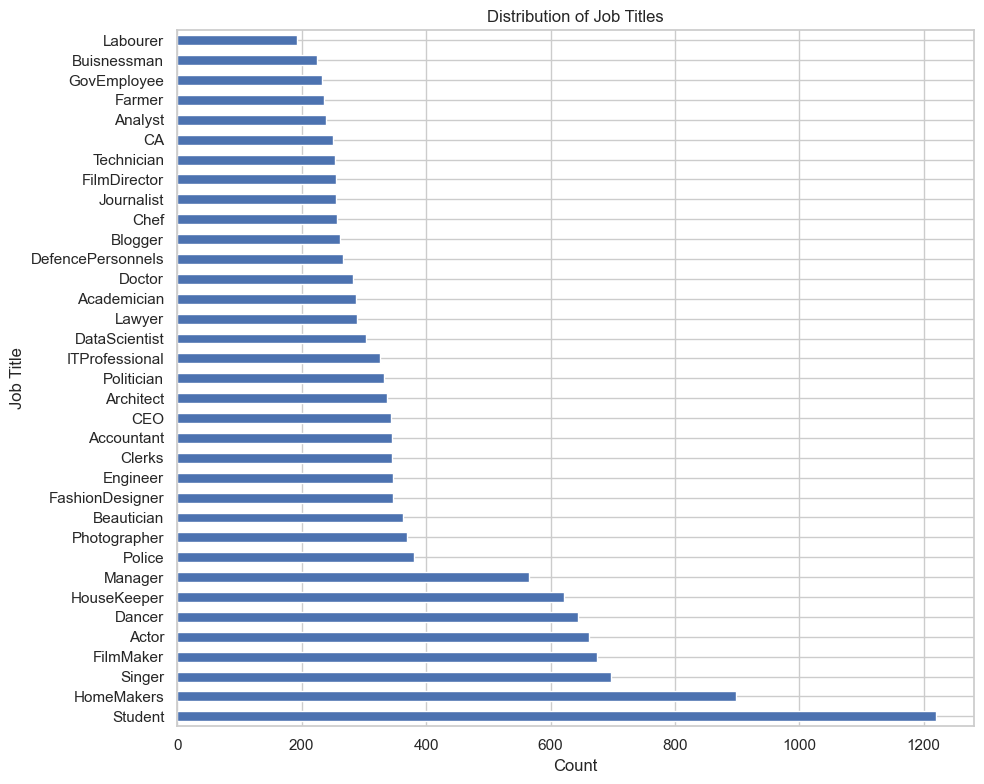

In [78]:
health['job_title'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.title("Distribution of Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

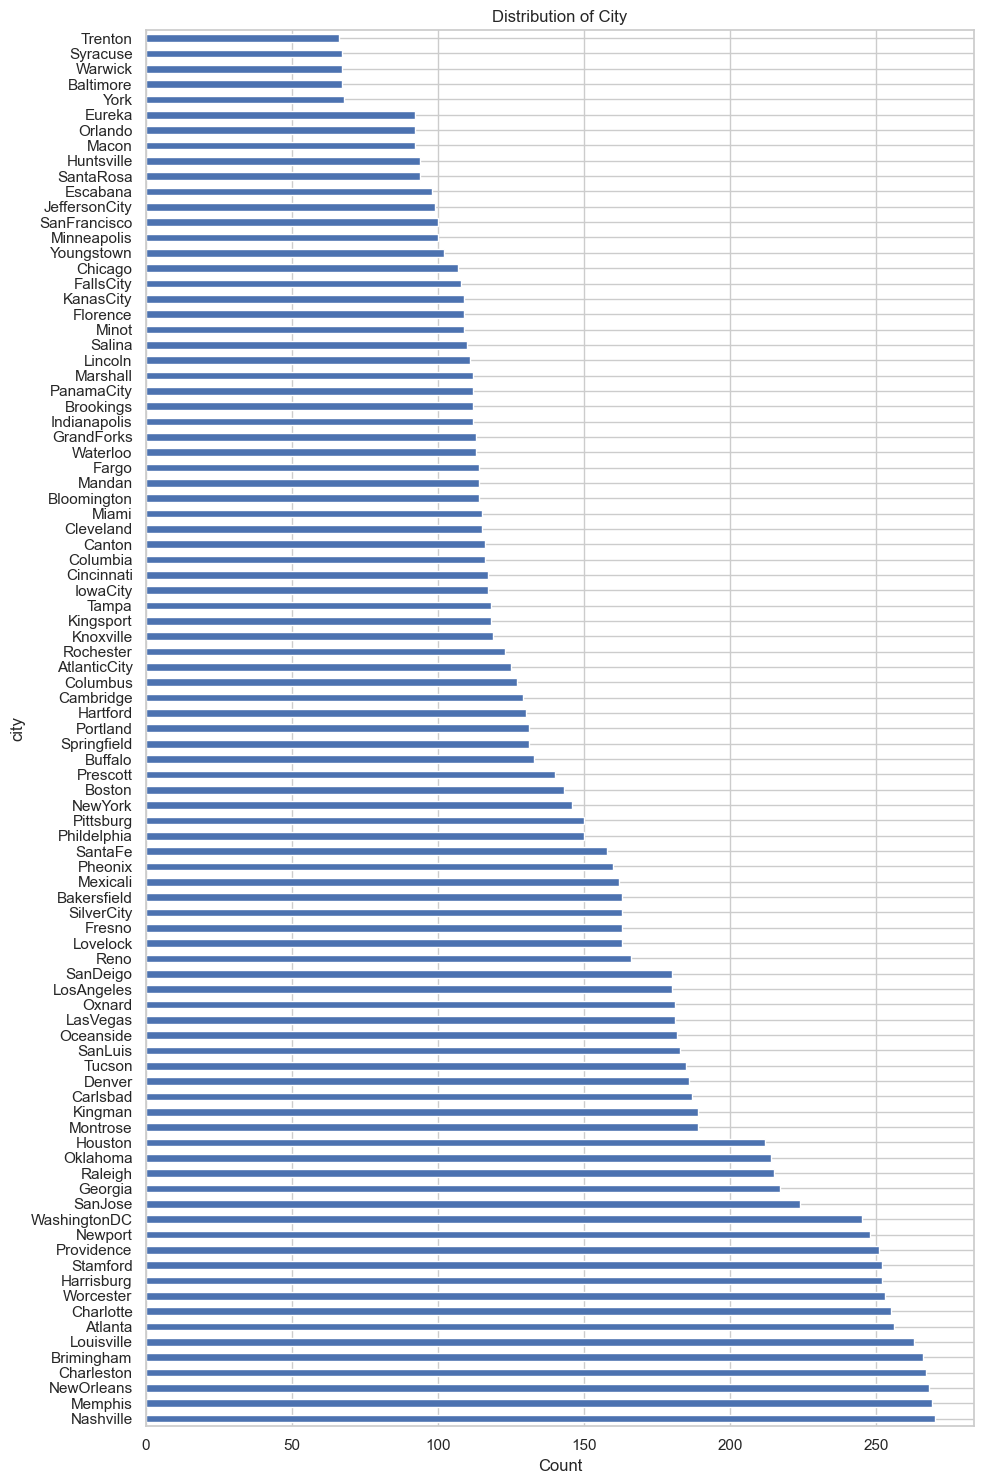

In [79]:
health['city'].value_counts().plot(kind='barh', figsize=(10, 15))
plt.title("Distribution of City")
plt.xlabel("Count")
plt.ylabel("city")
plt.tight_layout()
plt.show()

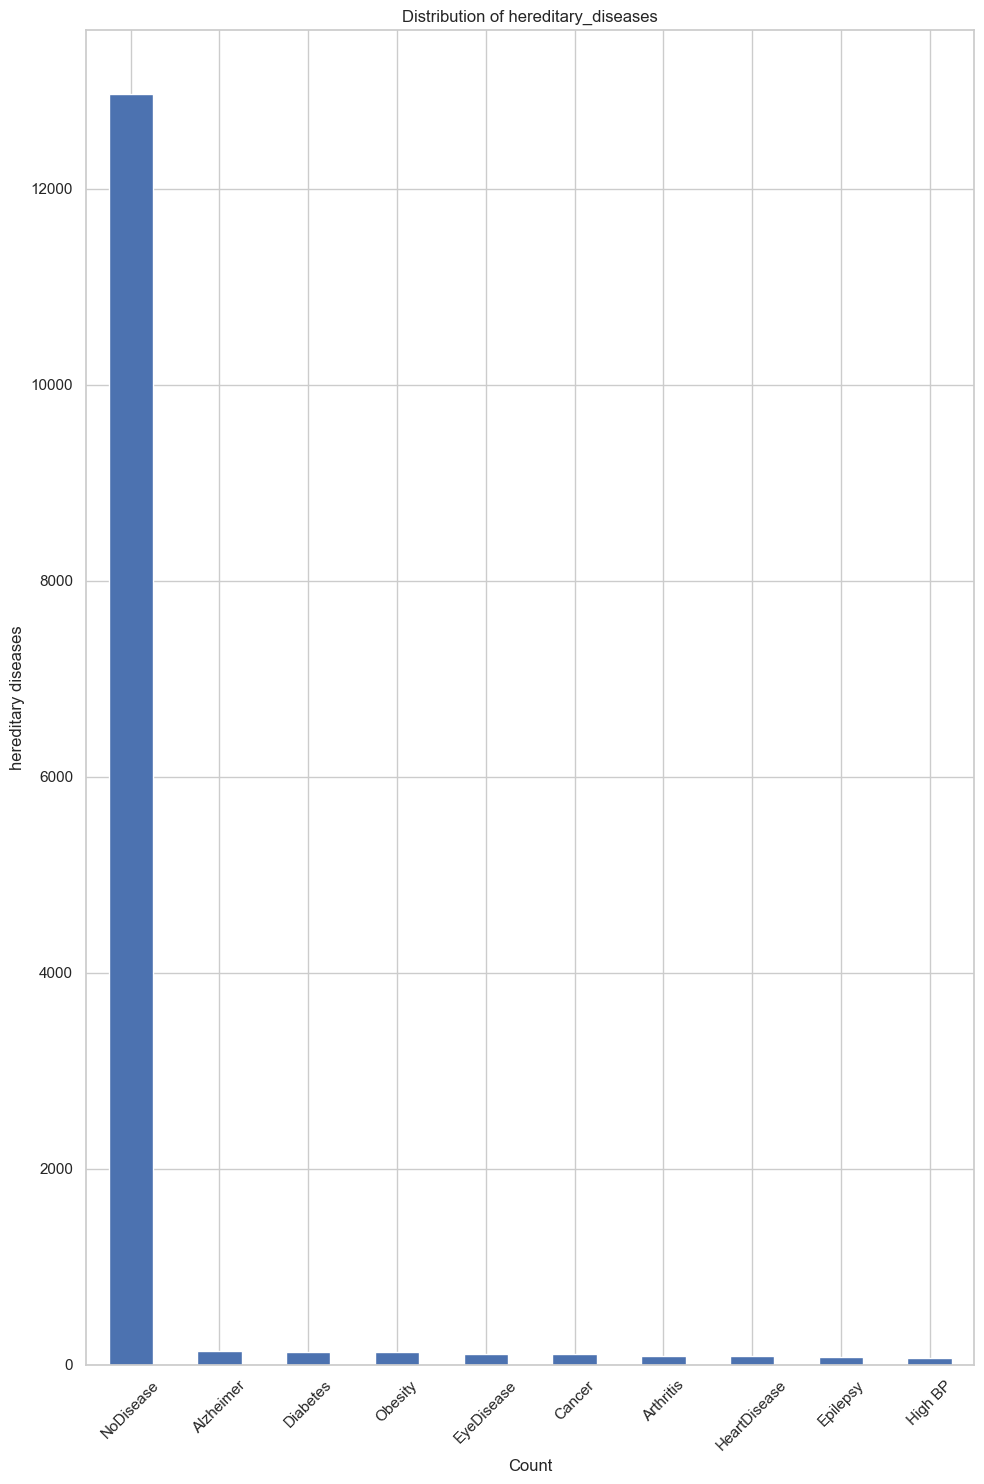

In [80]:
health['hereditary_diseases'].value_counts().plot(kind='bar', figsize=(10, 15))
plt.title("Distribution of hereditary_diseases")
plt.xlabel("Count")
plt.ylabel("hereditary diseases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

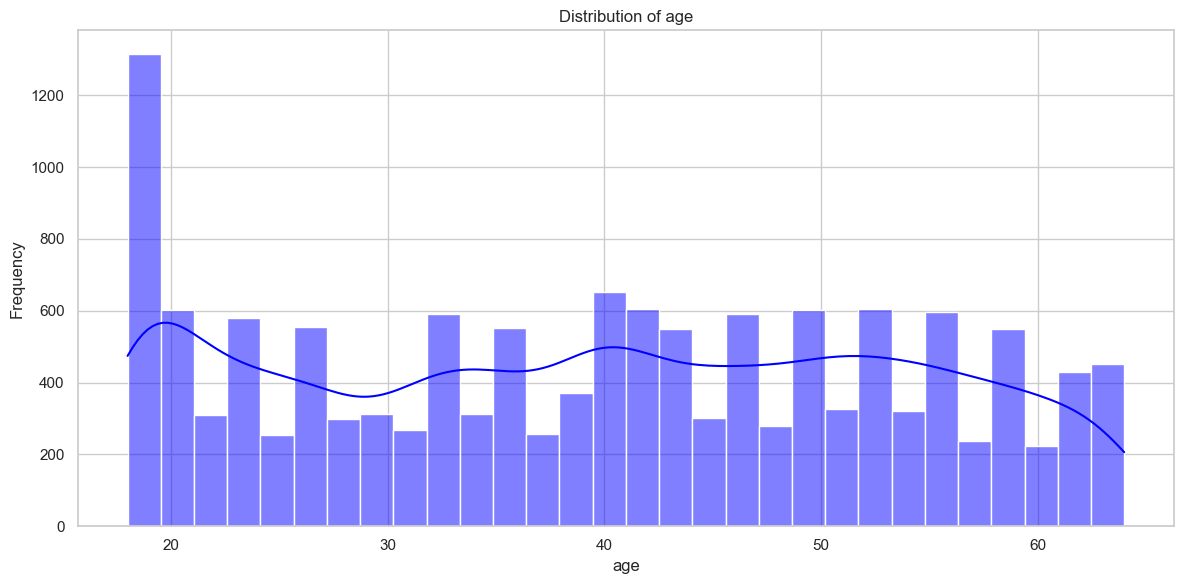

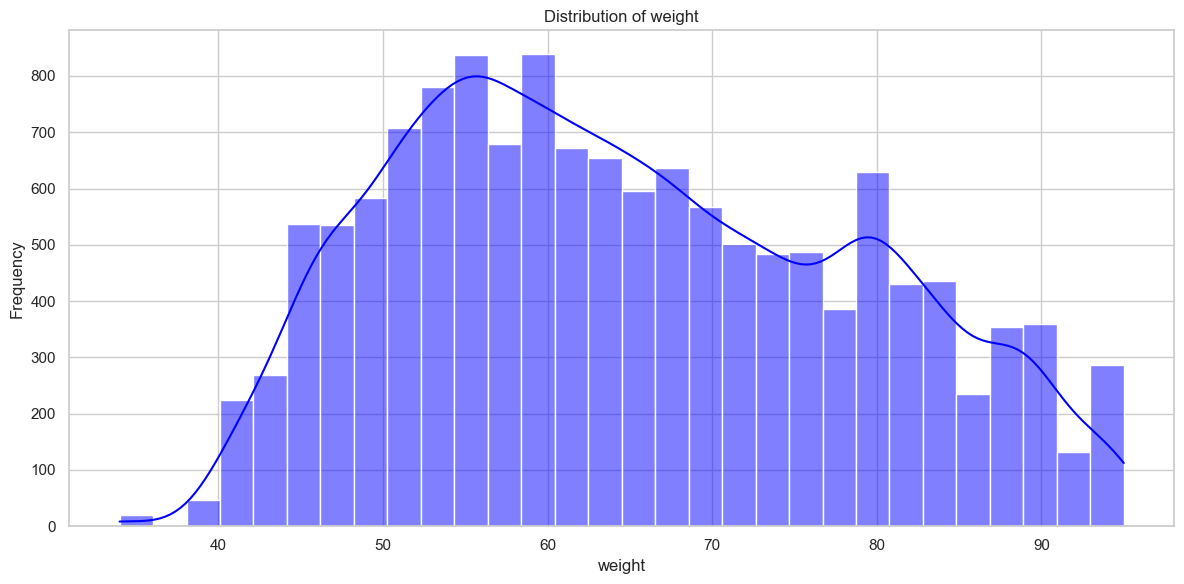

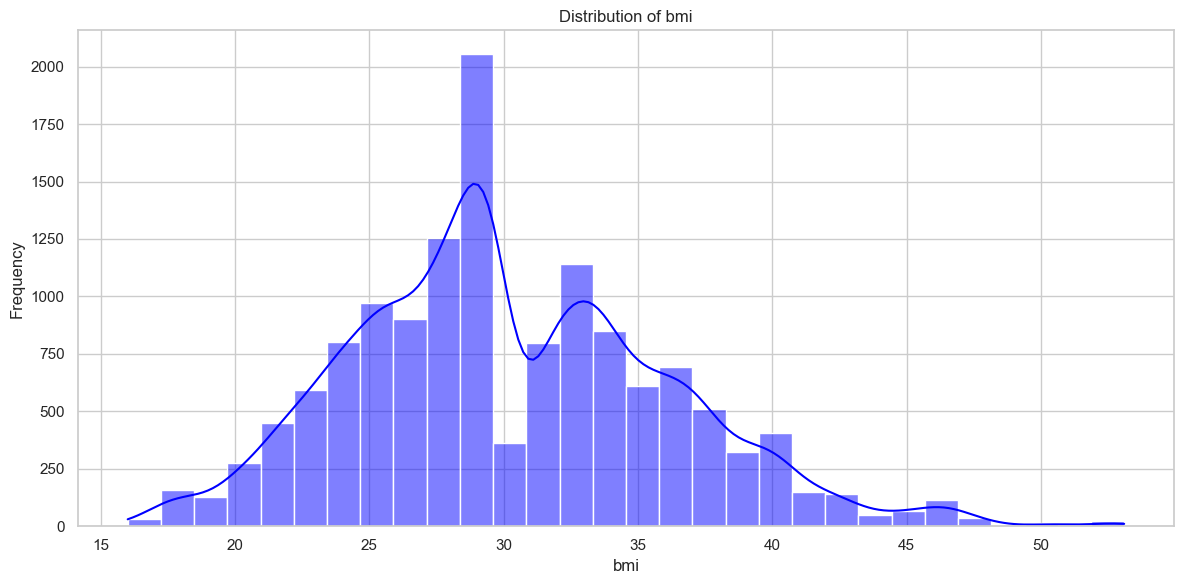

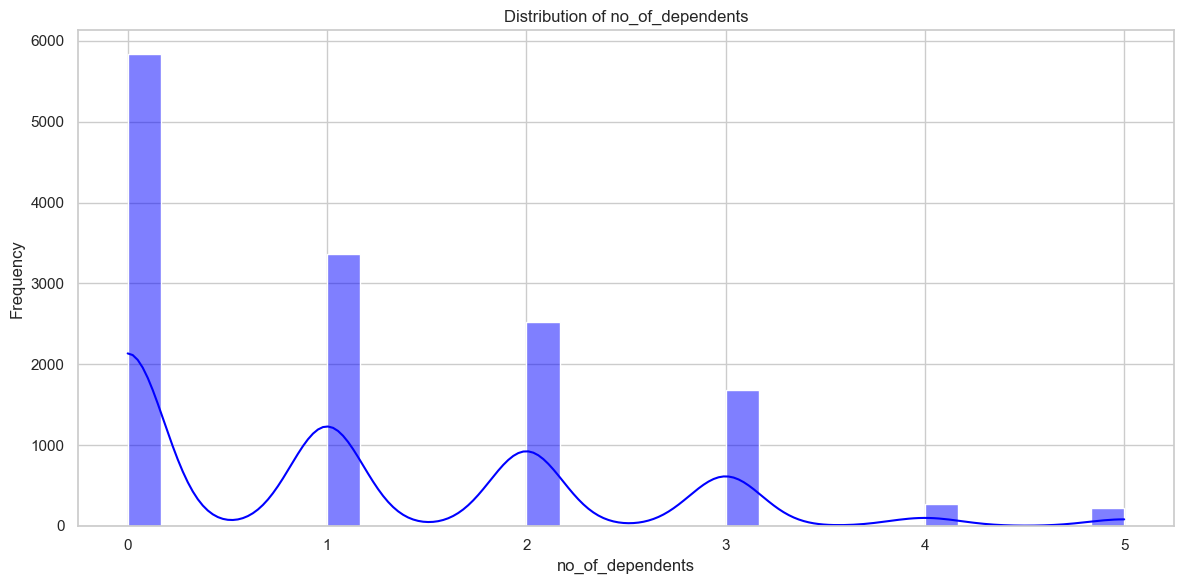

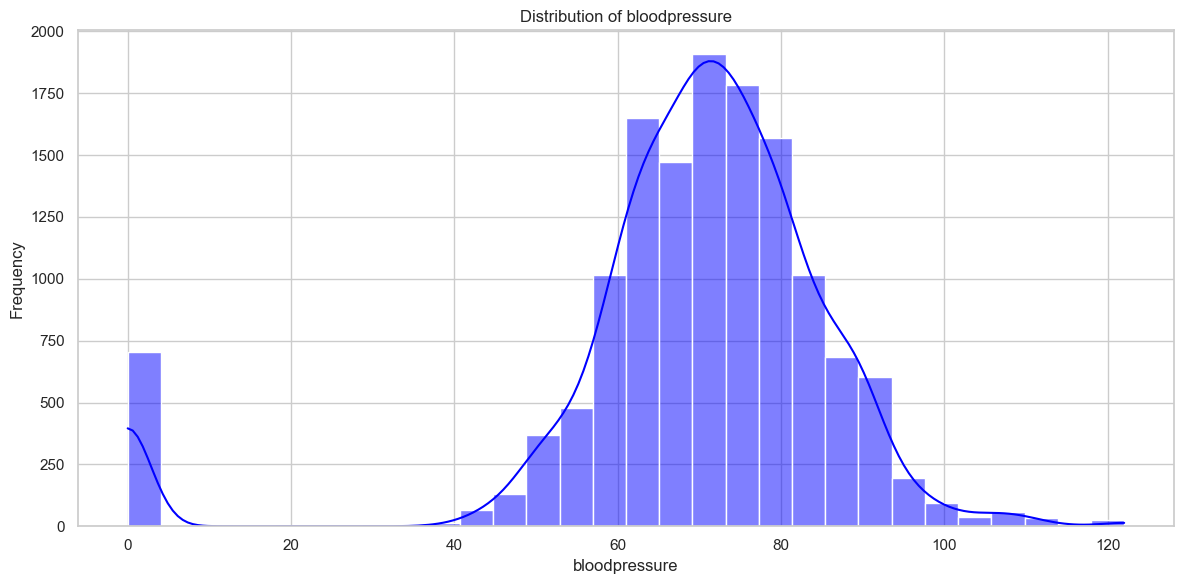

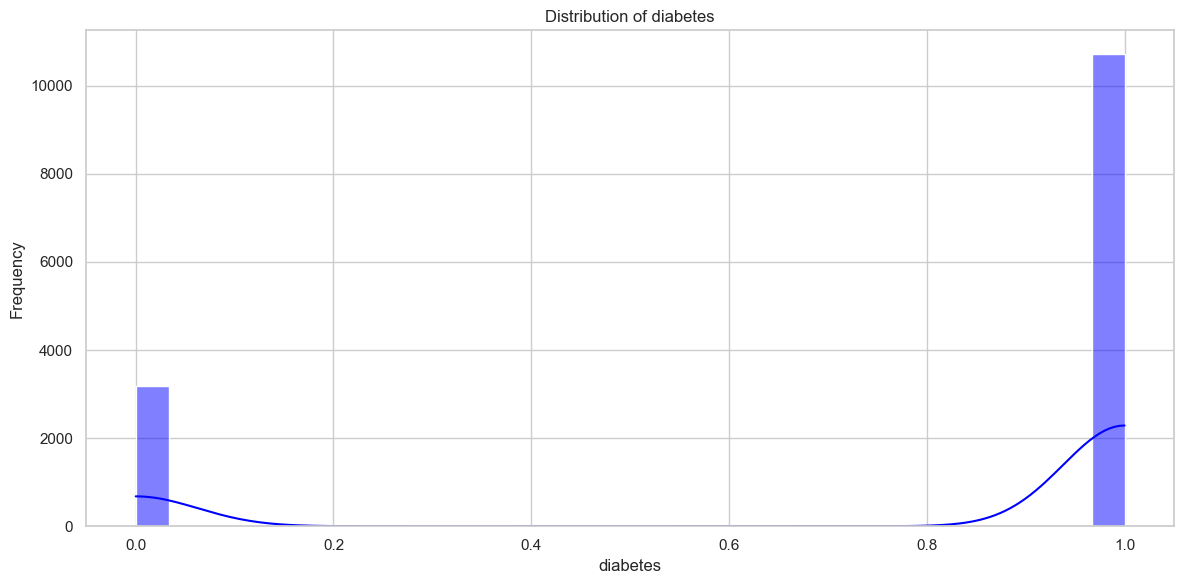

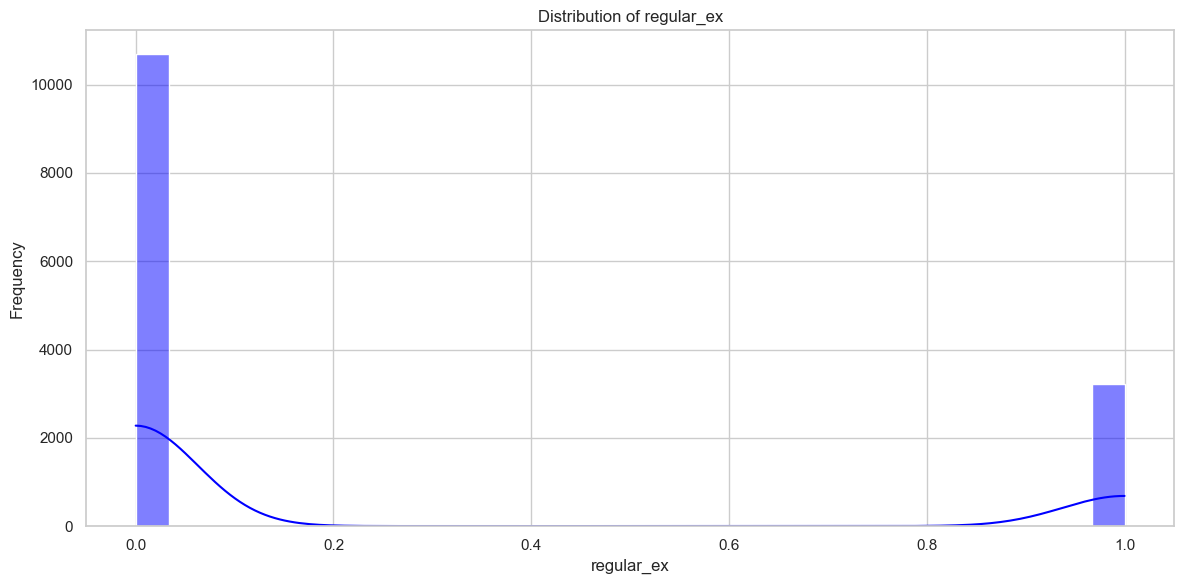

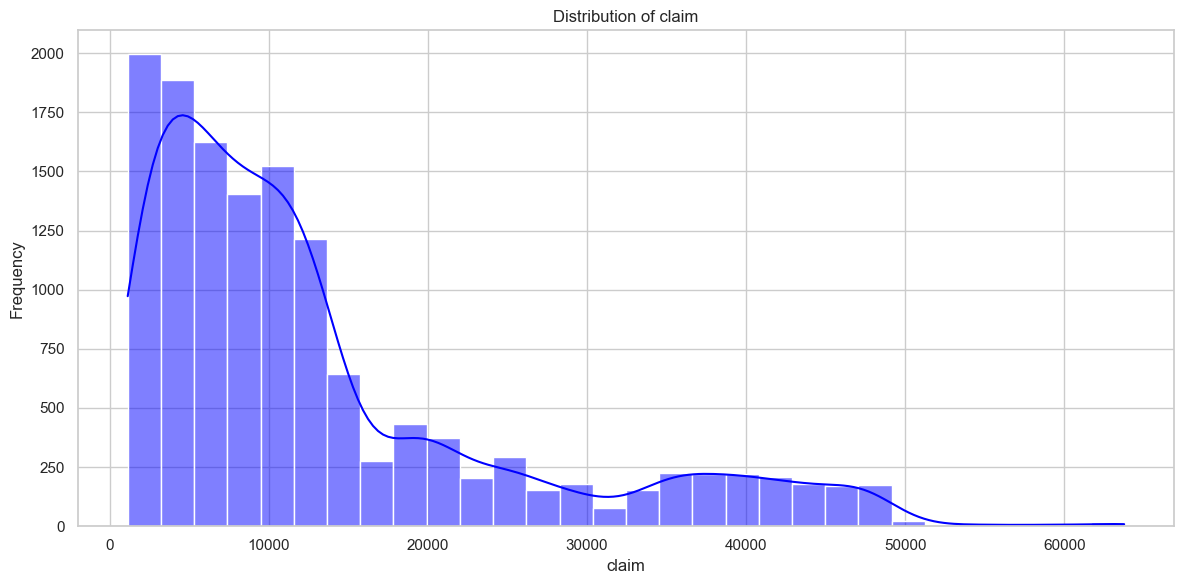

In [81]:
# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Split columns
numerical_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']
categorical_cols = ['sex', 'hereditary_diseases', 'smoker', 'city', 'job_title']

# Histograms for Numerical Features
for col in numerical_cols:
    plt.figure()
    sns.histplot(data=health, x=col, kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

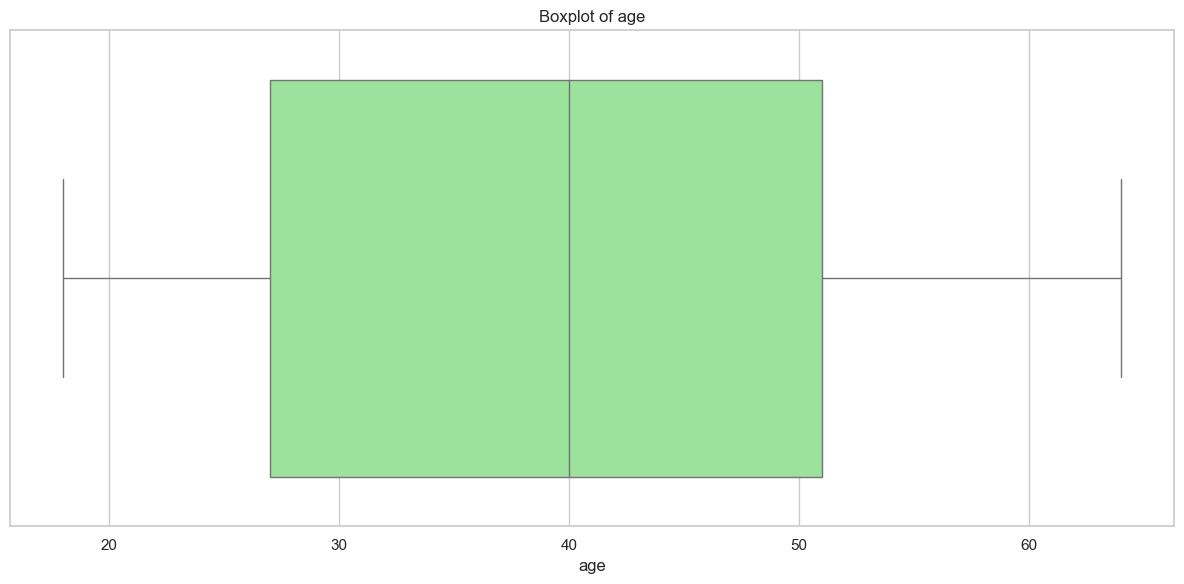

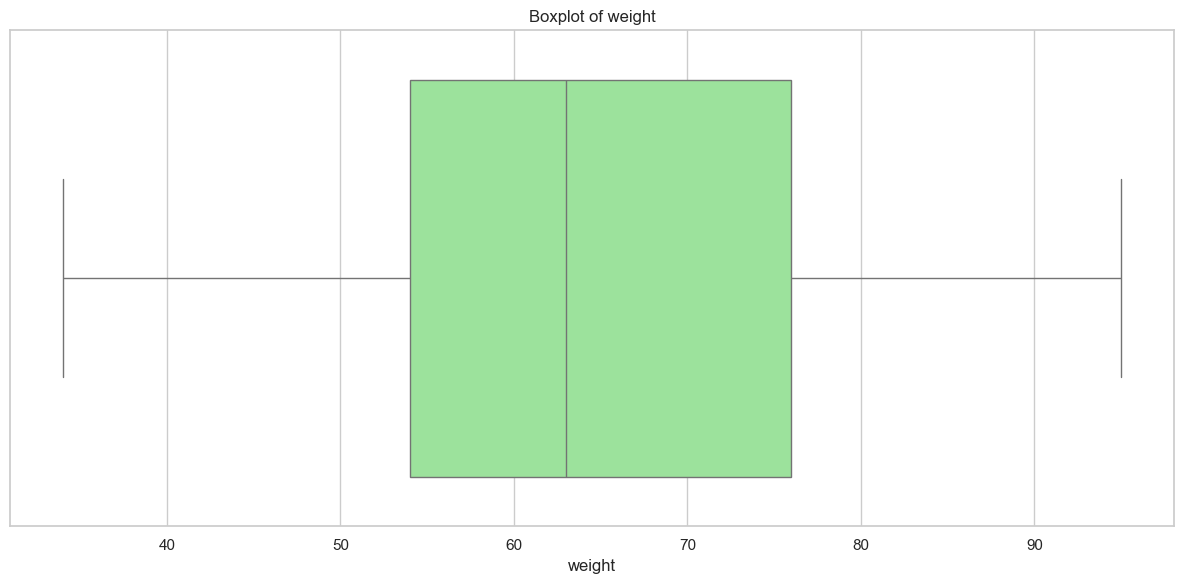

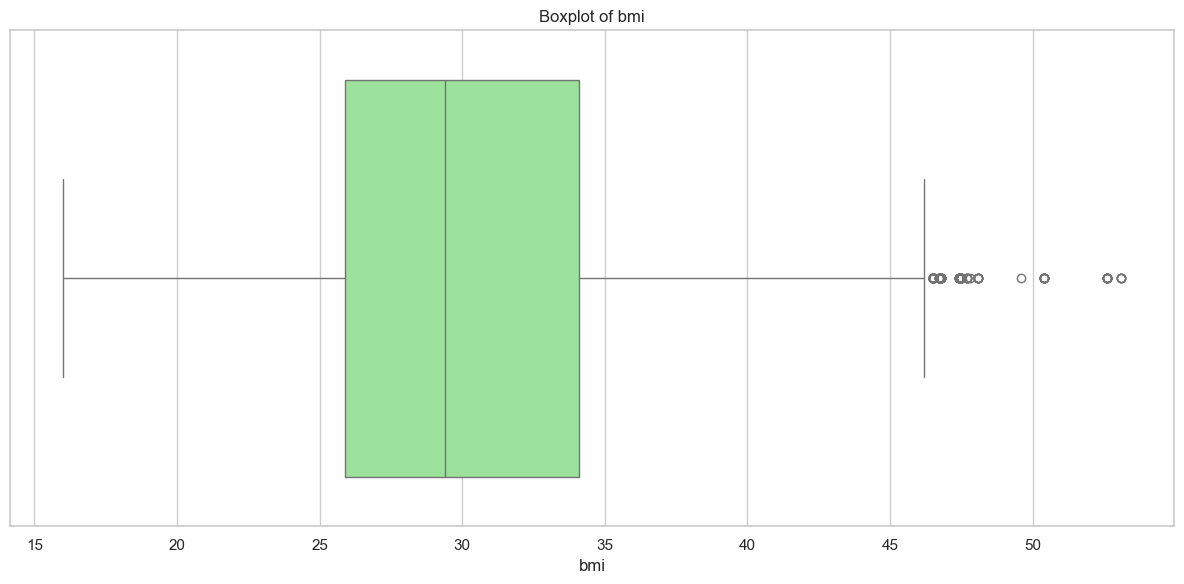

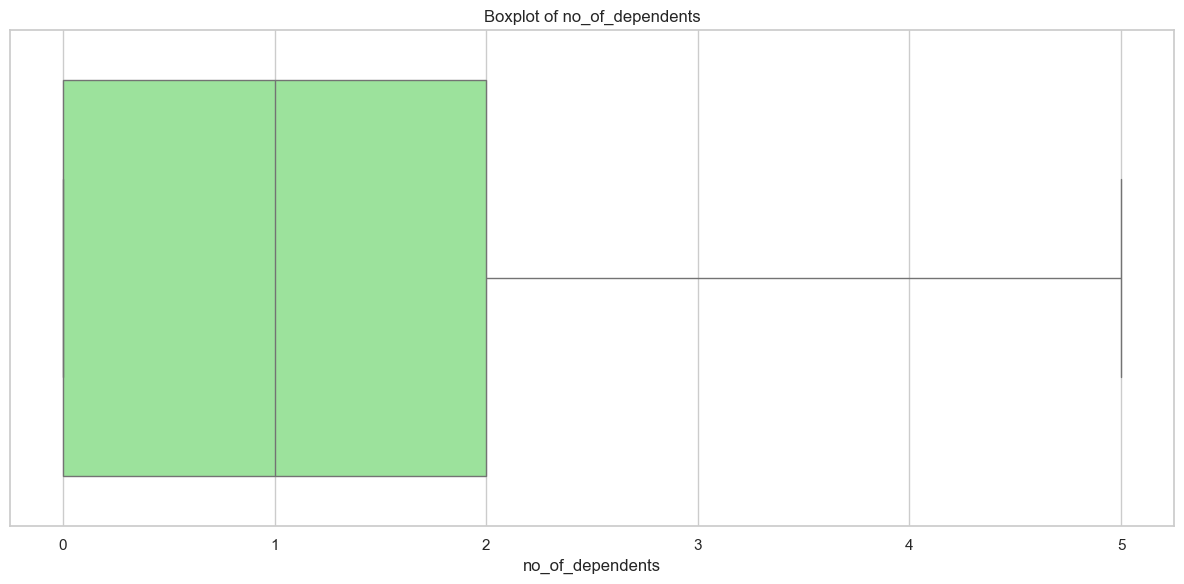

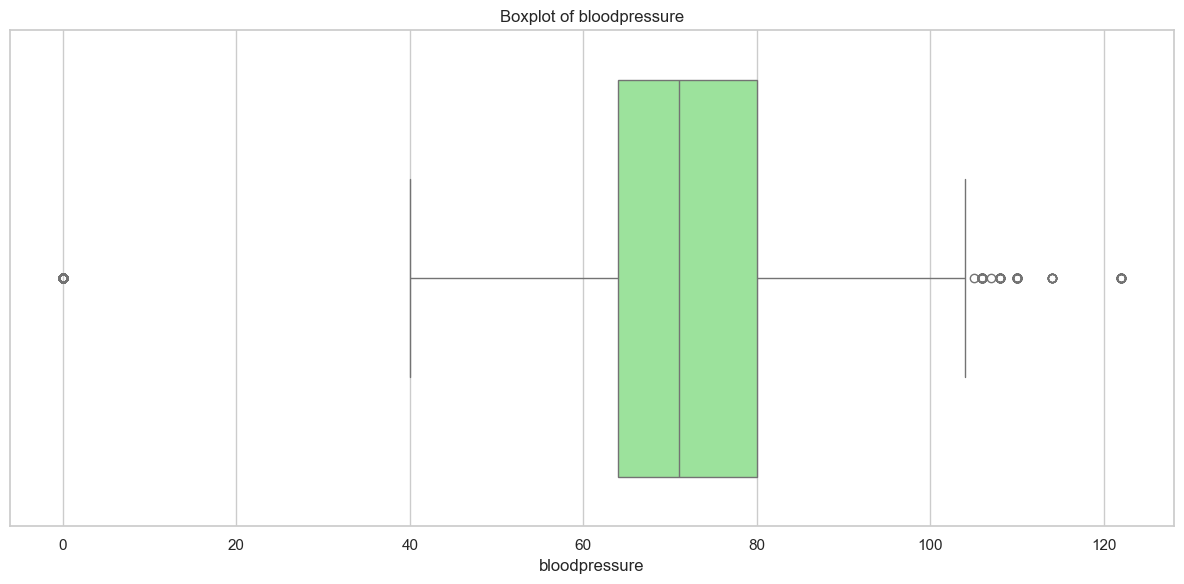

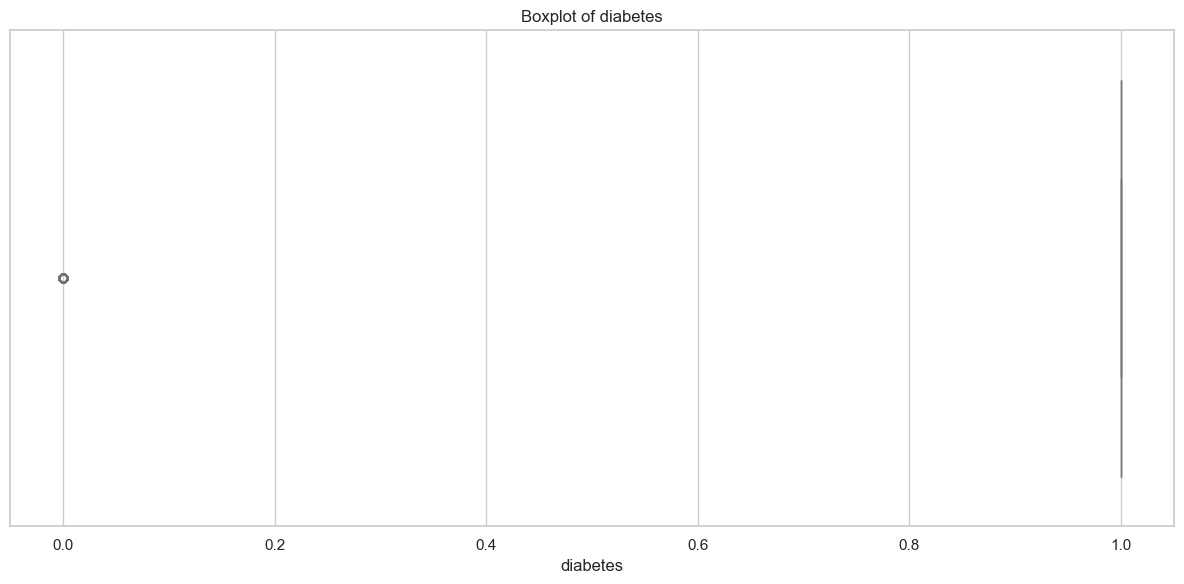

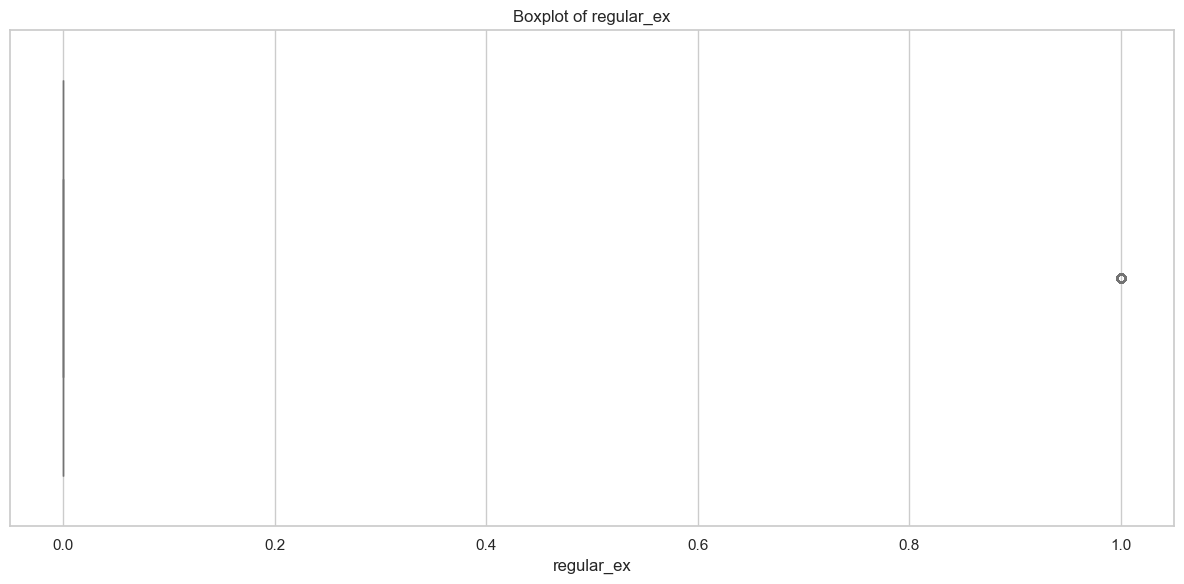

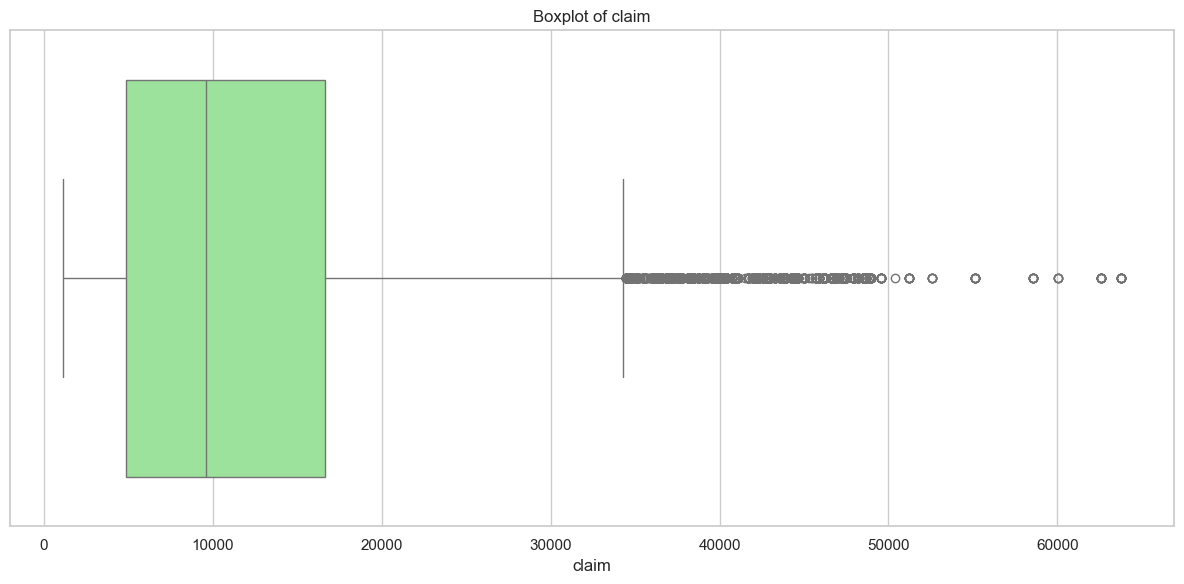

In [82]:

# Boxplots for Outlier Detection
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=health, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

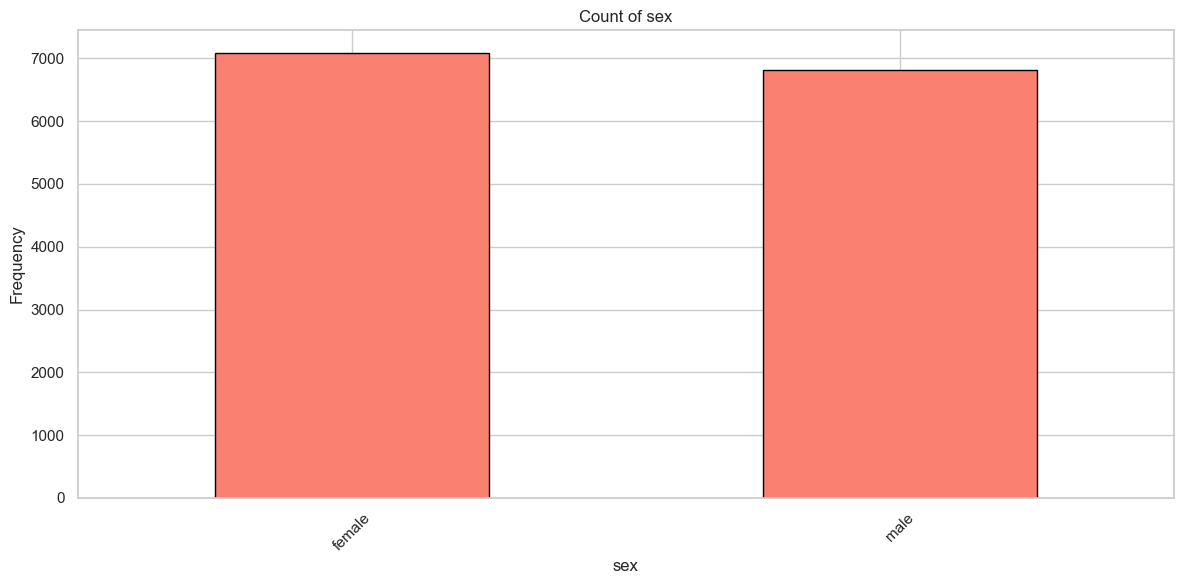

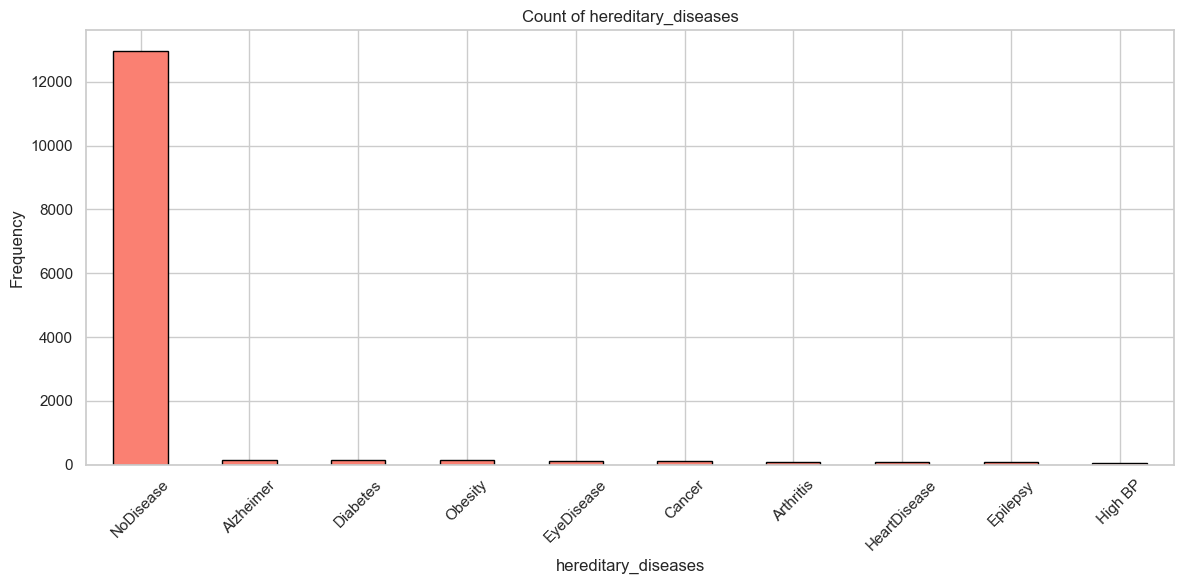

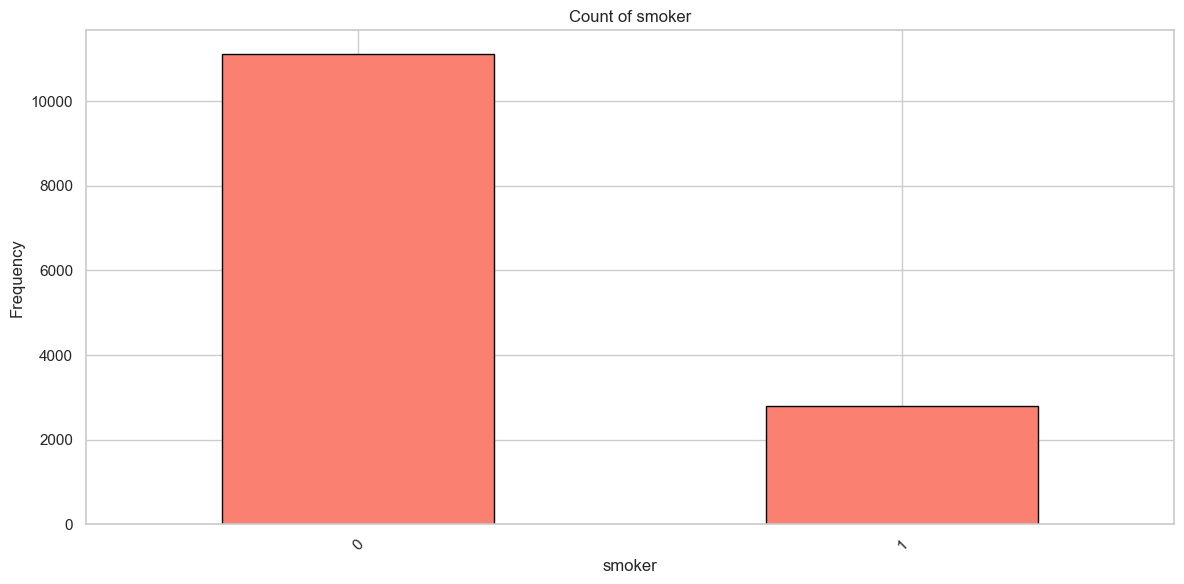

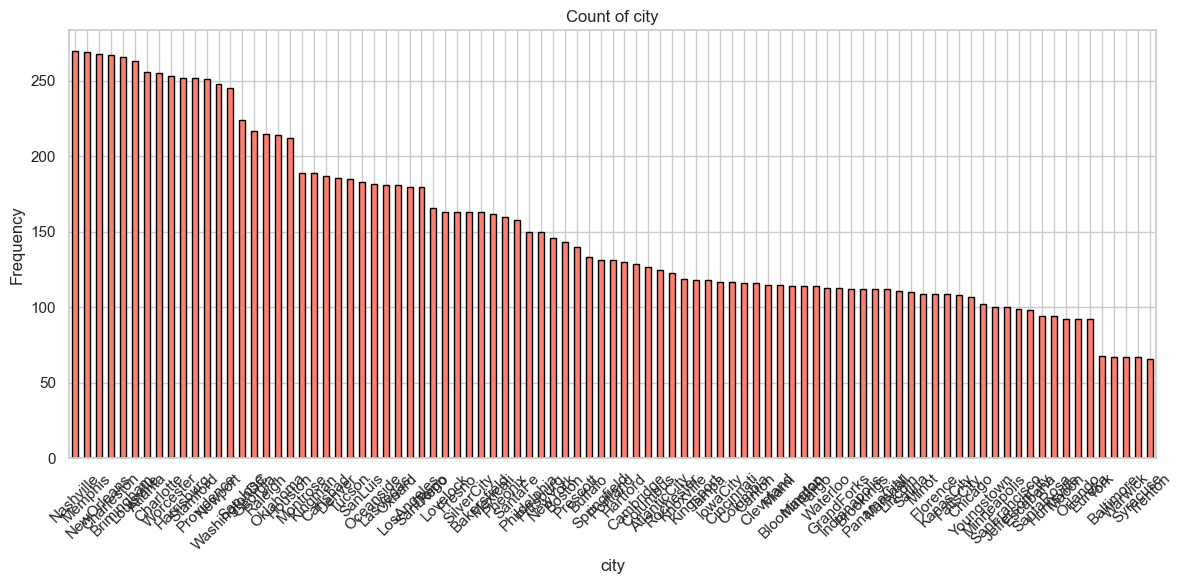

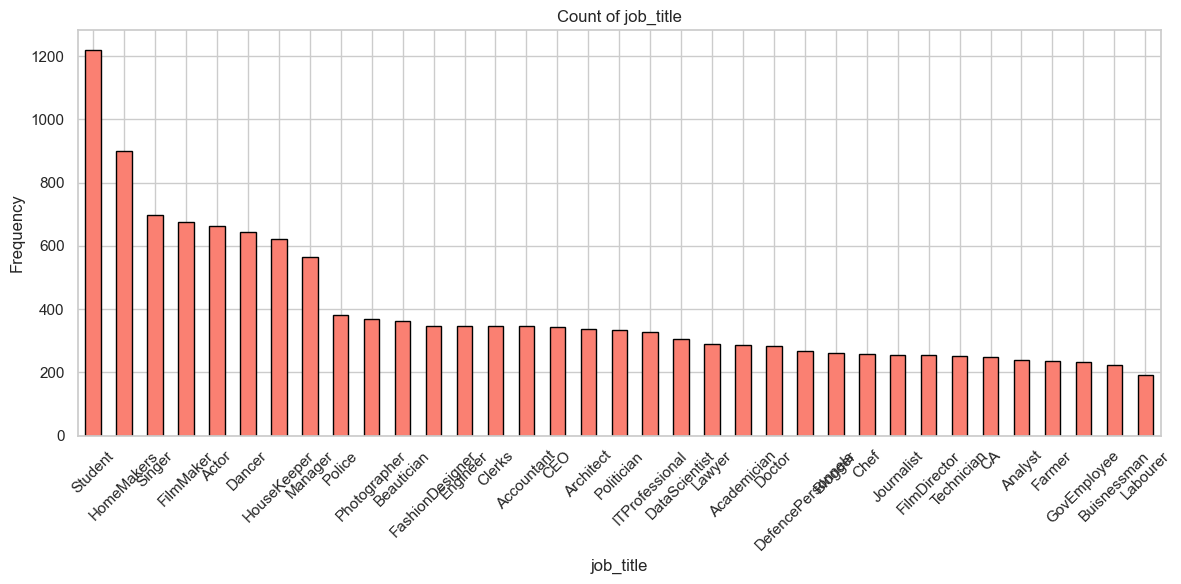

In [83]:
# Bar Plots for Categorical Features
for col in categorical_cols:
    plt.figure()
    health[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


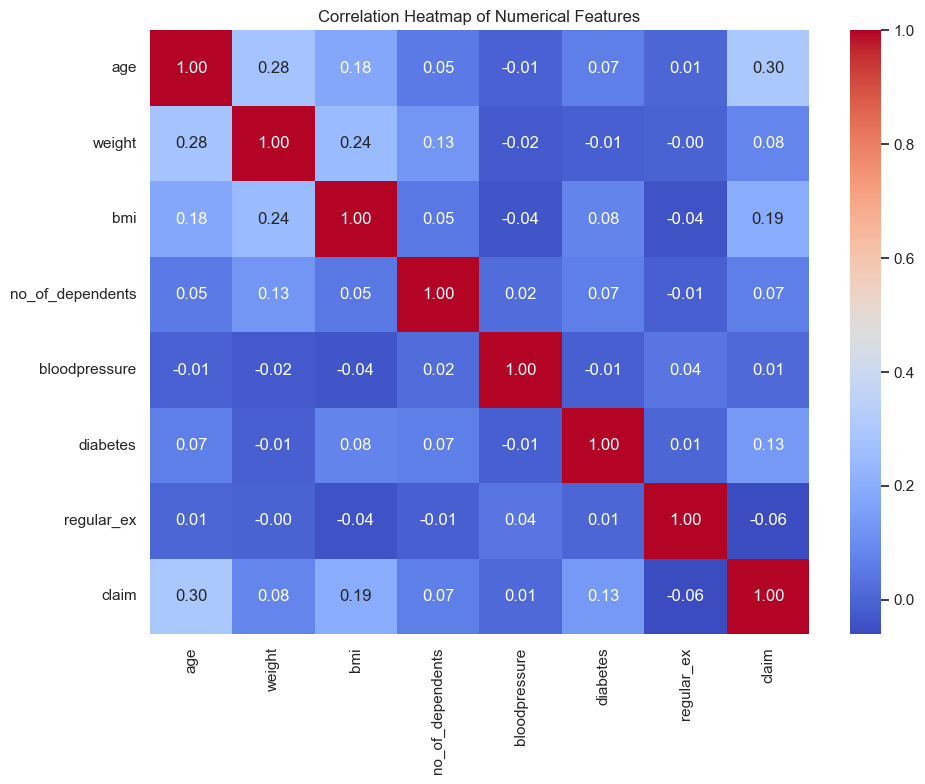

In [84]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(health[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

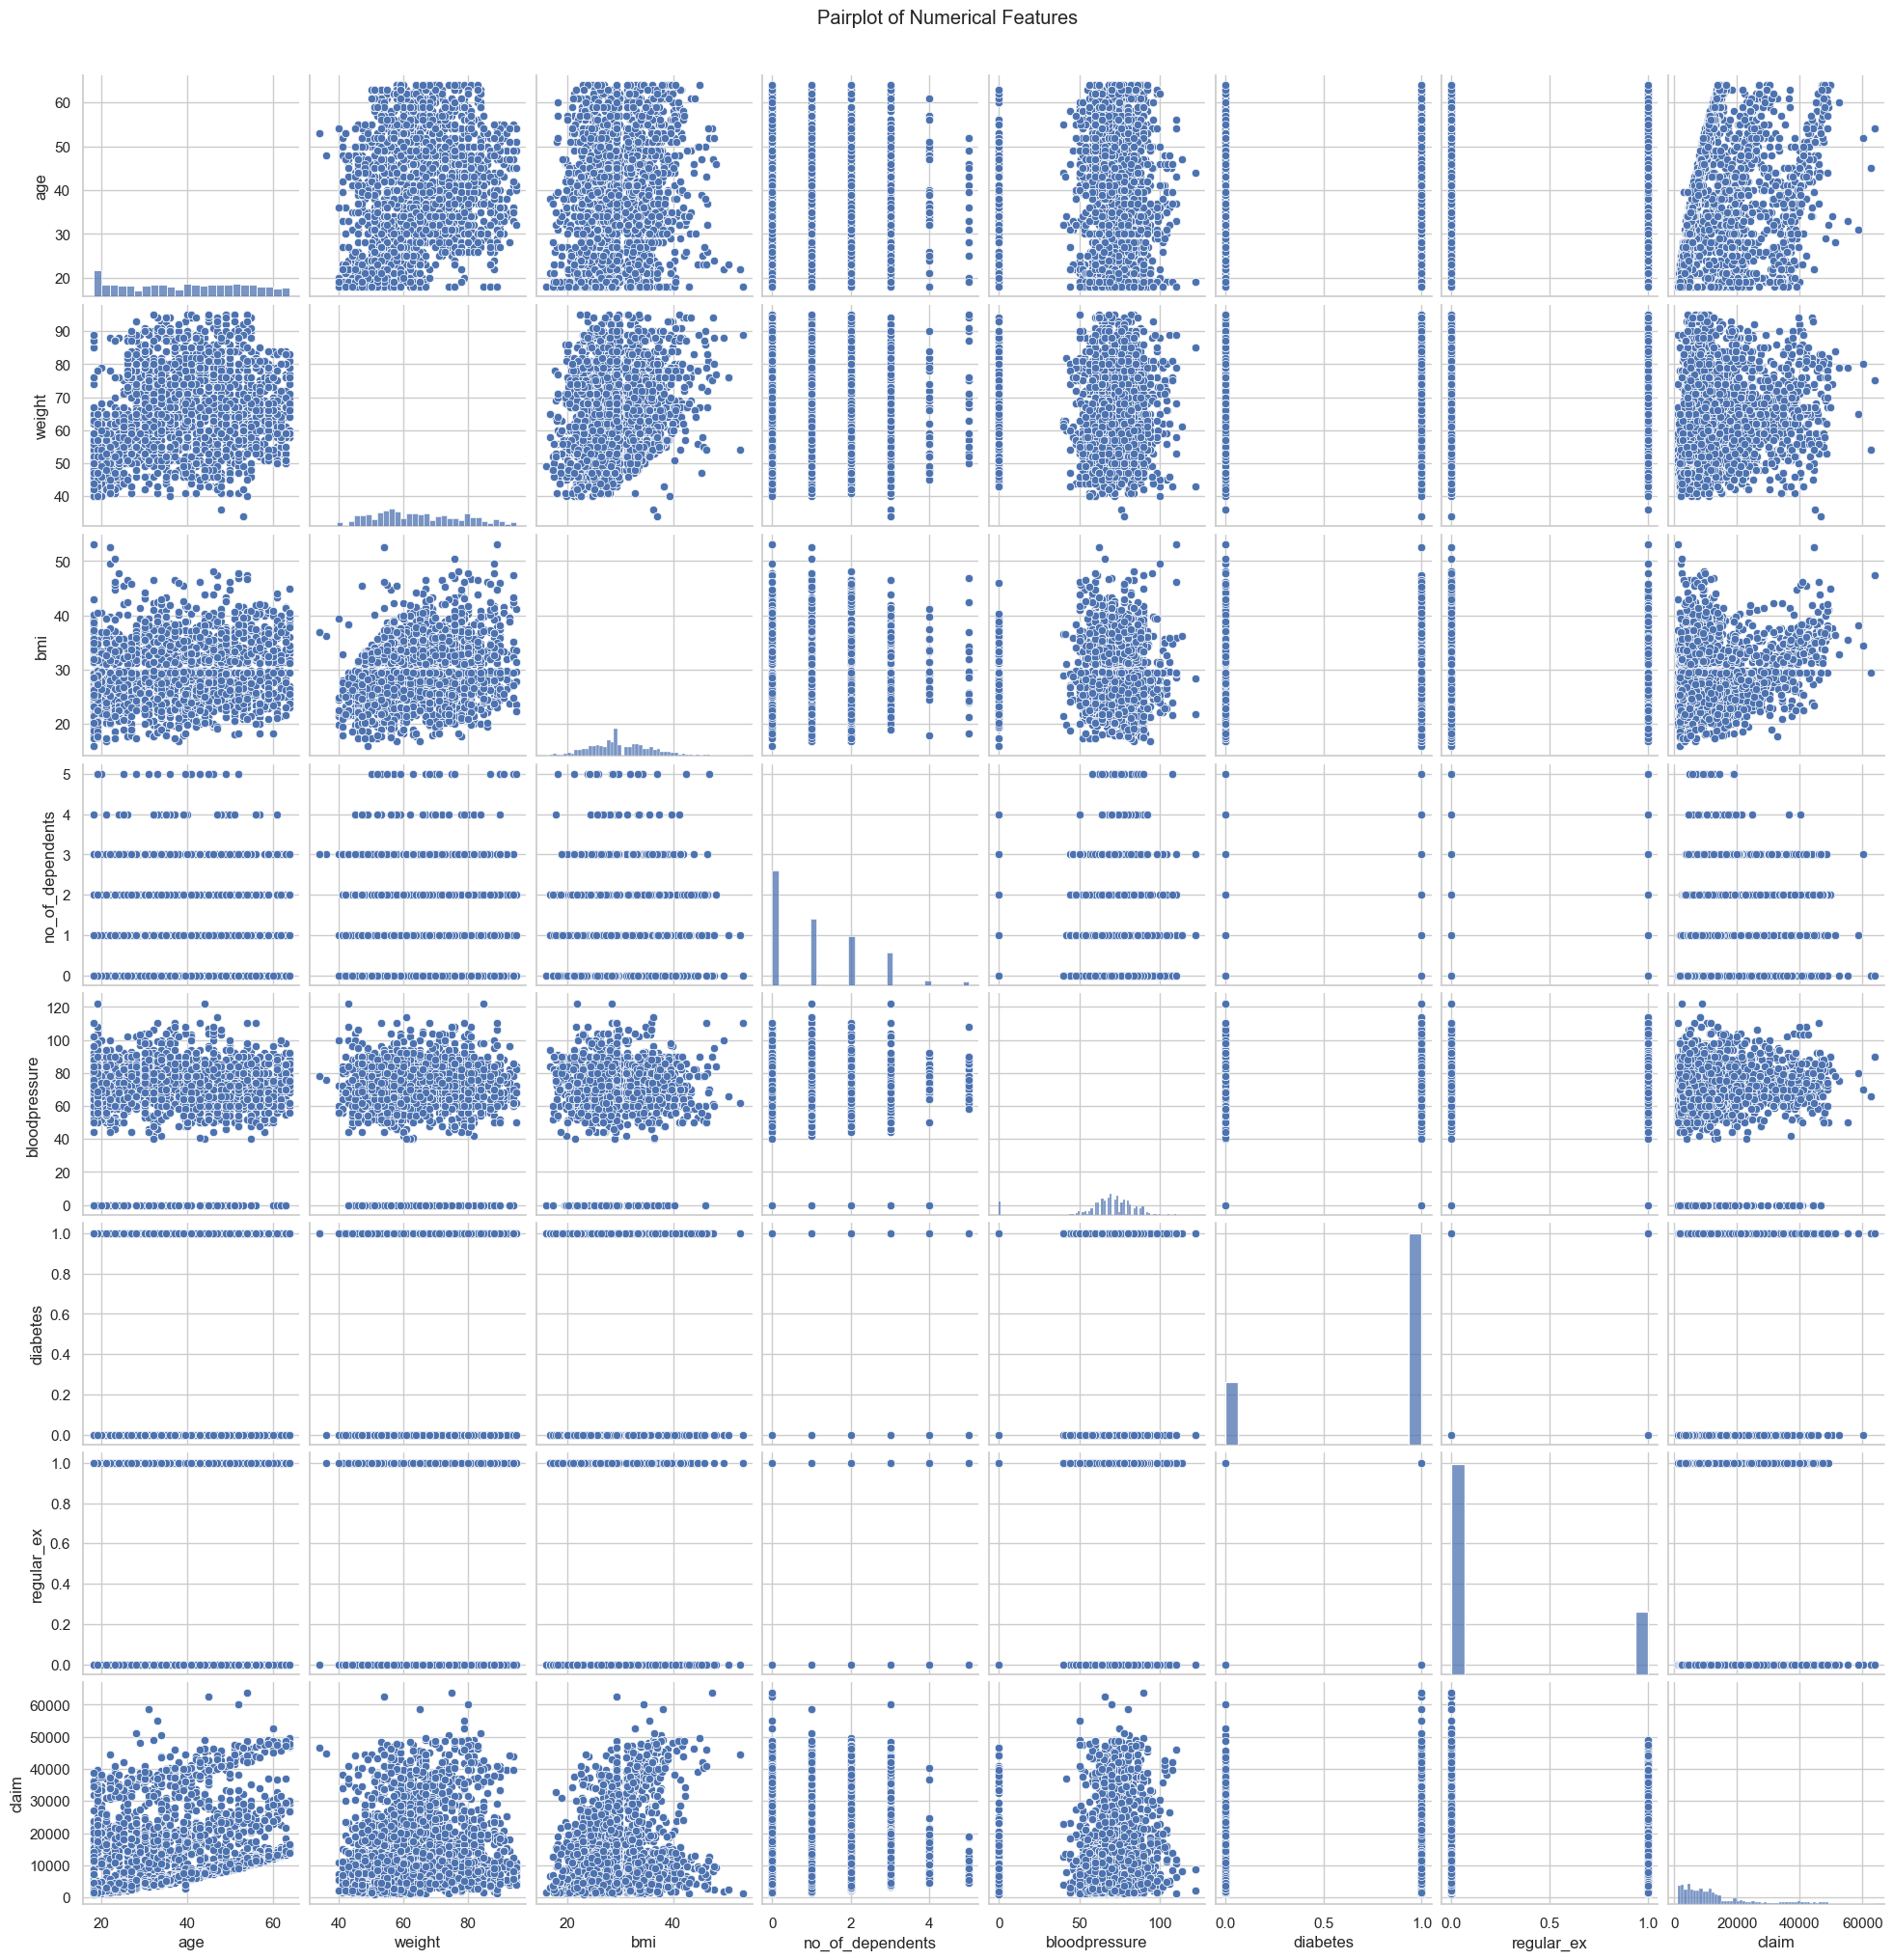

In [85]:
sns.pairplot(health[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [86]:
health.groupby('job_title')[numerical_cols].mean().sort_values('claim', ascending=False)

age     weight        bmi  no_of_dependents  bloodpressure  diabetes  regular_ex         claim
job_title                                                                                                              
Architect          40.744863  69.397626  29.291098          1.605341      66.744807  0.652819    0.338279  16942.634421
CEO                42.940626  71.520349  29.266570          0.970930      68.293605  0.738372    0.130814  16895.202035
Journalist         41.683721  67.839216  28.480784          1.211765      73.043137  0.862745    0.298039  16406.960784
Accountant         39.550725  62.892754  28.955362          1.017391      75.020290  0.750725    0.214493  15953.736522
Manager            44.656270  64.410619  31.565133          1.090265      67.507965  0.902655    0.159292  15929.033628
ITProfessional     41.273006  68.401840  32.086810          1.411043      61.101227  0.822086    0.226994  15696.202761
DataScientist      41.686445  64.259868  30.447039          1.500000      66.608553  0.789474    0.190789  15632.620395
FilmMaker          45.642823  64.958519  29.673037          1.251852      71.725926  0.733333    0.293333  15589.002074
Clerks             37.054498  67.544928  31.042899          1.591304      64.521739  0.750725    0.191304  15448.815942
Lawyer             44.653979  67.892734  30.778893          1.235294      68.816609  0.837370    0.224913  15065.629066
Engineer           39.369969  67.135838  29.913584          1.057803      64.867052  0.736994    0.346821  14848.408671
Buisnessman        39.599772  68.334821  31.065179          1.321429      72.138393  0.705357    0.316964  14609.106696
Photographer       37.129730  64.924324  30.890270          0.940541      66.605405  0.683784    0.181081  14332.897297
Dancer             39.877578  62.337984  30.630698          0.755039      71.829457  0.792248    0.274419  14282.128217
Actor              40.650901  63.637462  30.129305          1.007553      64.936556  0.711480    0.178248  14220.134894
CA                 41.732906  66.488000  32.509200          1.300000      65.416000  0.760000    0.160000  14212.222000
HouseKeeper        40.368182  63.799035  31.086656          1.075563      69.898714  0.729904    0.236334  14149.098232
Politician         45.763103  70.243243  31.354354          1.345345      73.033033  0.825826    0.120120  13721.385285
Police             41.785396  61.837270  29.088189          1.139108      68.787402  0.682415    0.275591  13549.825722
Singer             41.302942  66.344333  29.439455          1.090387      69.261119  0.741750    0.265423  13484.422095
Academician        39.745348  65.749129  30.905226          1.013937      66.909408  0.885017    0.264808  13237.620906
FashionDesigner    40.380576  69.112717  29.740173          1.104046      69.167630  0.817919    0.263006  13148.379191
HomeMakers         38.758253  61.288098  28.954950          0.899889      71.231368  0.751947    0.309232  13029.644939
Doctor             43.753483  68.042403  29.651237          1.176678      69.568905  0.759717    0.127208  12815.986219
Beautician         39.246115  67.330579  30.563361          1.336088      61.837466  0.699725    0.261708  12797.322039
FilmDirector       41.266667  67.792157  31.067843          1.156863      69.333333  0.882353    0.247059  11366.667451
Student            24.695646  57.259836  29.590820          0.840164      69.631148  0.754918    0.221311  11039.068361
GovEmployee        38.909483  69.568966  30.562069          1.237069      65.603448  0.706897    0.185345  10223.267672
Farmer             41.595745  61.825532  28.942979          1.217021      74.727660  0.761702    0.323404  10081.003404
DefencePersonnels  42.364662  67.500000  29.873684          1.078947      68.289474  0.819549    0.075188   9554.918421
Chef               43.014316  63.968872  30.417899          1.186770      69.124514  0.875486    0.194553   9471.626070
Technician         38.343463  69.695652  31.615020          1.786

In [87]:
numerical_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']

for col in numerical_cols:
    fig = px.scatter(health, x=col, y='claim', 
                     trendline='ols',  # add regression line
                     title=f'{col} vs. Claim with Trendline',
                     opacity=0.5,
                     color_discrete_sequence=['teal'])
    fig.show()


C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\2750294494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




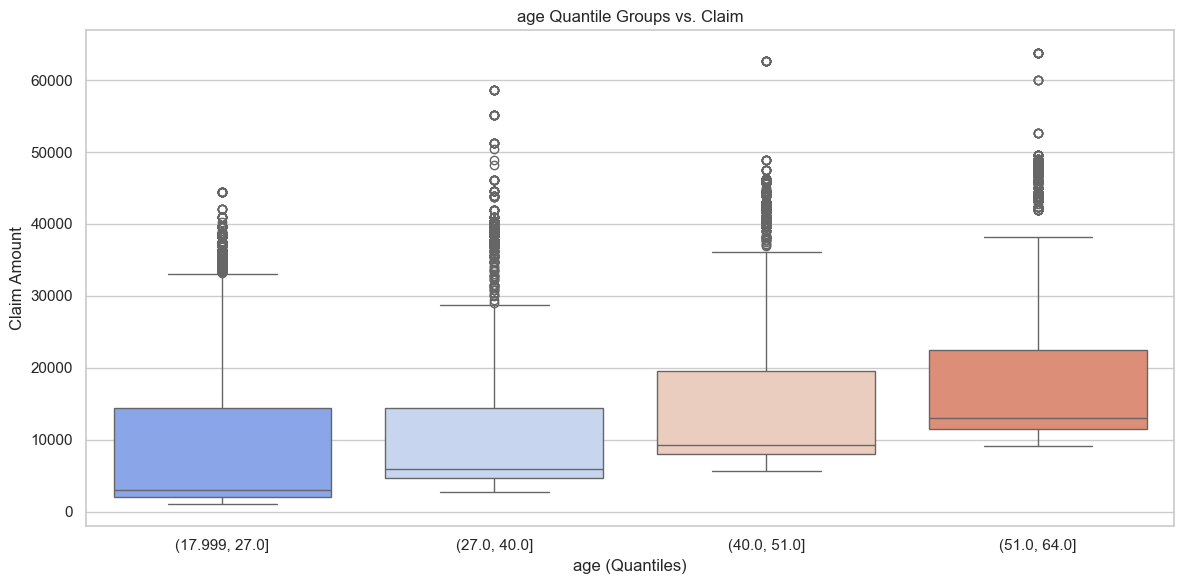

C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\2750294494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




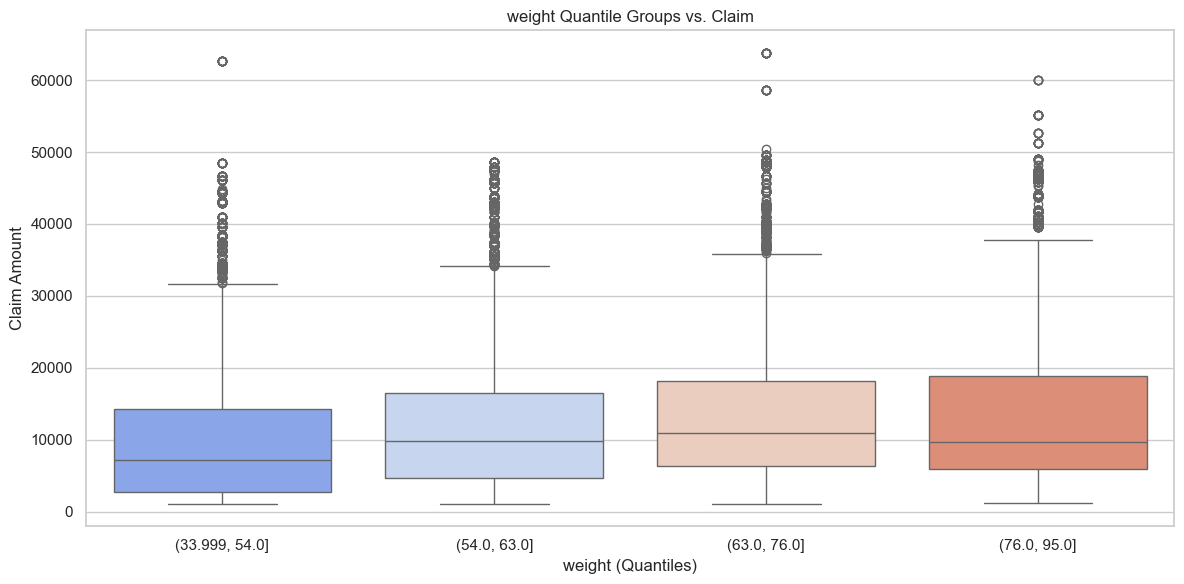

C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\2750294494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




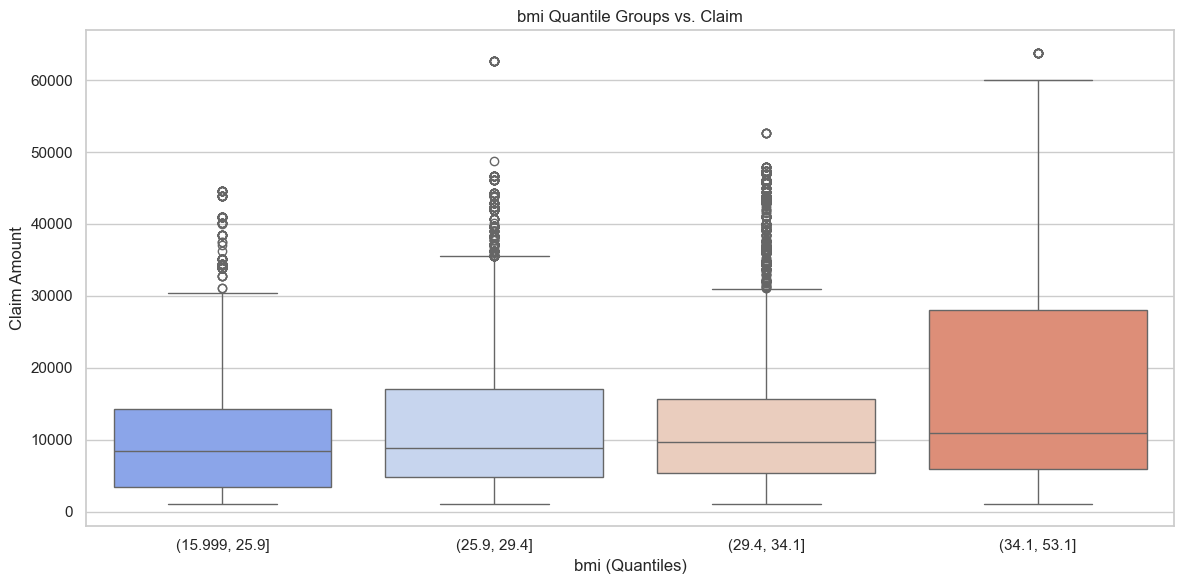

C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\2750294494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




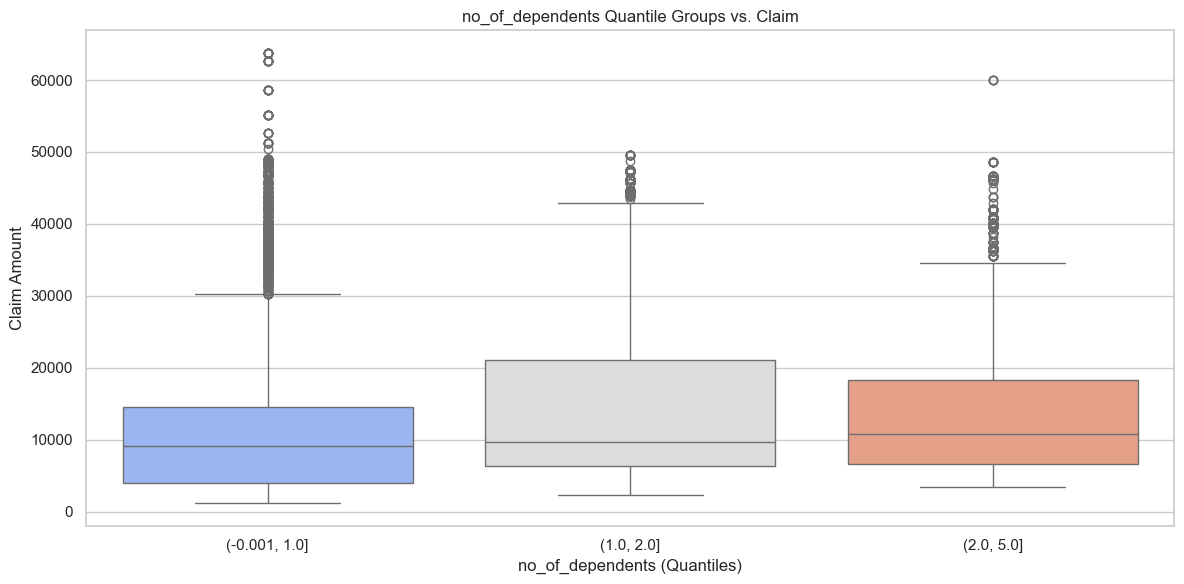

C:\Users\duvvu\AppData\Local\Temp\ipykernel_9904\2750294494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




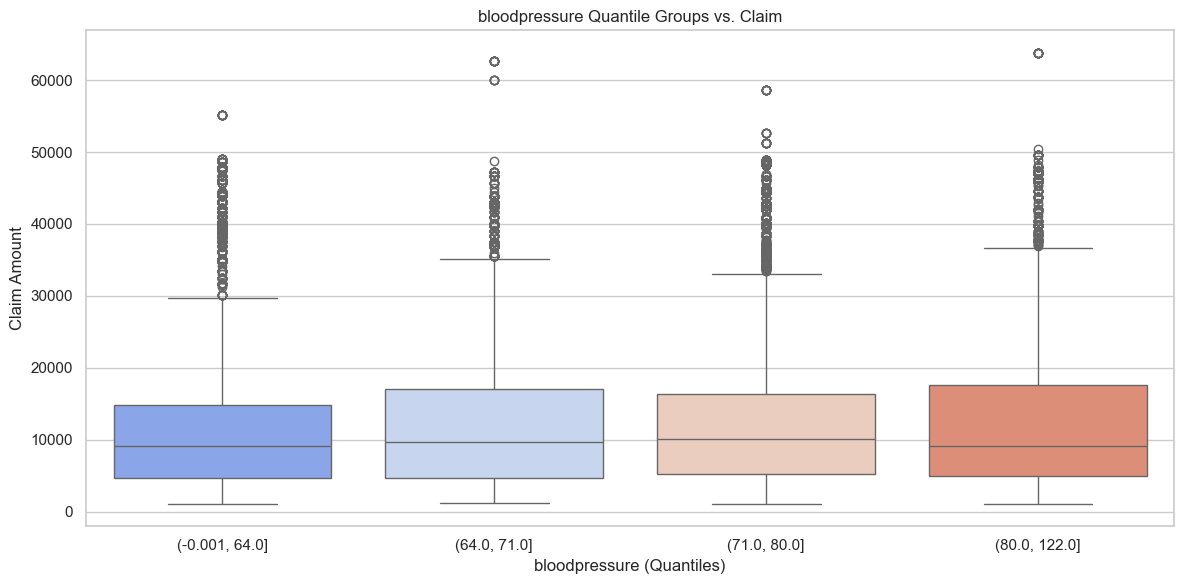

In [88]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=pd.qcut(health[col], q=4, duplicates='drop'), y=health['claim'], palette='coolwarm')
    plt.title(f'{col} Quantile Groups vs. Claim')
    plt.xlabel(f'{col} (Quantiles)')
    plt.ylabel('Claim Amount')
    plt.tight_layout()
    plt.show()

In [89]:
categorical_cols = ['sex', 'smoker', 'diabetes', 'regular_ex', 'hereditary_diseases', 'age_group', 'job_title_grouped']


In [90]:
for col in categorical_cols:
    if col in health.columns:
        claim_means = health.groupby(col)['claim'].mean().sort_values(ascending=False)
        claim_means_df = claim_means.reset_index()
        claim_means_df.columns = [col, 'mean_claim']

        fig = px.bar(claim_means_df, x=col, y='mean_claim',
                     color_discrete_sequence=['coral'],
                     title=f'Average Claim Amount by {col}',
                     text='mean_claim')  # Optional: show values on bars

        fig.update_traces(marker_line_color='black', marker_line_width=1)
        fig.update_layout(
            title_x=0.5,
            margin=dict(t=80),  # Top margin to prevent title cutoff
            xaxis_tickangle=45,
            yaxis_title='Average Claim',
            title_font=dict(size=18)
)
        fig.show()

In [91]:
categorical_cols = ['sex', 'smoker', 'diabetes', 'regular_ex', 'hereditary_diseases', 'age', 'job_title'] # replace with your actual categorical columns

for col in categorical_cols:
    fig = px.box(health, x=col, y='claim', title=f'Claim Amount by {col}')
    fig.show()

In [92]:
# Example: Standardize similar titles
health['job_title_cleaned'] = health['job_title'].str.lower().str.strip()

# Optional: Map similar roles together
title_map = {
    'software engineer': 'developer',
    'data scientist': 'data professional',
    'ml engineer': 'data professional',
    # Add more mappings as needed
}
health['job_title_grouped'] = health['job_title_cleaned'].replace(title_map)

In [93]:
health.head()

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker         city  bloodpressure  diabetes  regular_ex    job_title    claim job_title_cleaned job_title_grouped
0  60.0    male      64  24.3           NoDisease                 1       0      NewYork             72         0           0        Actor  13112.6             actor             actor
1  49.0  female      75  22.6           NoDisease                 1       0       Boston             78         1           1     Engineer   9567.0          engineer          engineer
2  32.0  female      64  17.8            Epilepsy                 2       1  Phildelphia             88         1           1  Academician  32734.2       academician       academician
3  61.0  female      53  36.4           NoDisease                 1       1    Pittsburg             72         1           0         Chef  48517.6              chef              chef
4  19.0  female      50  20.6           NoDisease                 0       0      Buffalo             82         1           0   HomeMakers   1731.7        homemakers        homemakers

## Feature Selection & Data Cleaning

In [94]:
health.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim', 'job_title_cleaned', 'job_title_grouped'], dtype='object')

In [95]:
health.head()

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker         city  bloodpressure  diabetes  regular_ex    job_title    claim job_title_cleaned job_title_grouped
0  60.0    male      64  24.3           NoDisease                 1       0      NewYork             72         0           0        Actor  13112.6             actor             actor
1  49.0  female      75  22.6           NoDisease                 1       0       Boston             78         1           1     Engineer   9567.0          engineer          engineer
2  32.0  female      64  17.8            Epilepsy                 2       1  Phildelphia             88         1           1  Academician  32734.2       academician       academician
3  61.0  female      53  36.4           NoDisease                 1       1    Pittsburg             72         1           0         Chef  48517.6              chef              chef
4  19.0  female      50  20.6           NoDisease                 0       0      Buffalo             82         1           0   HomeMakers   1731.7        homemakers        homemakers

In [97]:
health.to_csv("data/health_updated.csv", index=False)

In [46]:
selected_features = [
    'age',
    'sex',
    'weight',
    'bmi',
    'hereditary_diseases',
    'no_of_dependents',
    'smoker',
    'city',
    'bloodpressure',
    'diabetes',
    'regular_ex',
    'job_title_grouped',   # Use this instead of original job_title
]

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
health['job_title_grouped'] = le.fit_transform(health['job_title_grouped'])

# Create label encoders
le_disease = LabelEncoder()
le_city = LabelEncoder()

# Apply
health['hereditary_diseases'] = le_disease.fit_transform(health['hereditary_diseases'])
health['city'] = le_city.fit_transform(health['city'])

In [48]:
health['sex'] = health['sex'].str.strip().str.lower()
health['sex'] = health['sex'].map({'male': 1, 'female': 0})
print(health['sex'].value_counts(dropna=False))

sex
0    7091
1    6813
Name: count, dtype: int64


In [49]:
health.head()

age  sex  weight   bmi  hereditary_diseases  no_of_dependents  smoker  city  bloodpressure  diabetes  regular_ex    job_title    claim job_title_cleaned  job_title_grouped
0  60.0    1      64  24.3                    8                 1       0    55             72         0           0        Actor  13112.6             actor                  2
1  49.0    0      75  22.6                    8                 1       0     5             78         1           1     Engineer   9567.0          engineer                 16
2  32.0    0      64  17.8                    4                 2       1    63             88         1           1  Academician  32734.2       academician                  0
3  61.0    0      53  36.4                    8                 1       1    64             72         1           0         Chef  48517.6              chef                 10
4  19.0    0      50  20.6                    8                 0       0     8             82         1           0   HomeMakers   1731.7        homemakers                 22

In [48]:
health.sample()

age  sex  weight   bmi  hereditary_diseases  no_of_dependents  smoker  city  bloodpressure  diabetes  regular_ex job_title    claim job_title_cleaned  job_title_grouped
5967  64.0    0      60  26.9                    8                 0       1     3             74         1           0       CEO  29331.0               ceo                  9

In [49]:
heatmap = [
    'age',
    'sex',
    'weight',
    'bmi',
    'hereditary_diseases',
    'no_of_dependents',
    'smoker',
    'city',
    'bloodpressure',
    'diabetes',
    'regular_ex',
    'job_title_grouped',   # Use this instead of original job_title
    'claim'
]

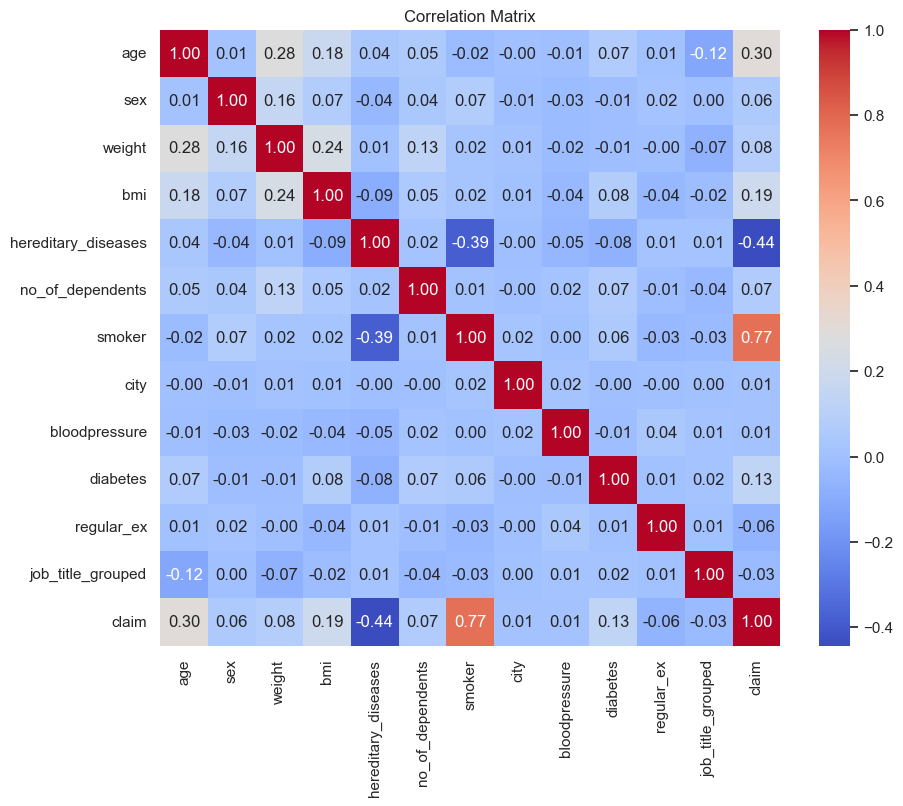

In [50]:

# Create a custom colormap with modified color intensity
correlation_matrix = health[heatmap].corr()

# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Splitting the dataset

In [ ]:
X = health[selected_features]
y = health['claim']  # Assuming 'claim' is the target variable you want to predict

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
pip install lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

results = []

for name, model in models.items():
    # Use scaled data for linear models
    if "Regression" in name or name in ["Ridge Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    mae = mean_absolute_error(y_test, y_pred)
    rmse = rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 11123, number of used features: 12
[LightGBM] [Info] Start training from score 13400.786719


In [ ]:
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)
print(results_df)

               Model      MAE     RMSE  R² Score
0      Random Forest   416.64  1941.72    0.9748
1            XGBoost   813.61  2124.30    0.9698
2           CatBoost  1203.55  2352.10    0.9630
3      Decision Tree   412.53  2537.30    0.9570
4           LightGBM  1408.48  2735.48    0.9500
5  Gradient Boosting  2736.71  4645.01    0.8558
6  Linear Regression  4127.15  6185.43    0.7443
7   Ridge Regression  4127.28  6185.41    0.7443
8   Lasso Regression  4127.15  6185.43    0.7443


C:\Users\duvvu\AppData\Local\Temp\ipykernel_22704\3394937650.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




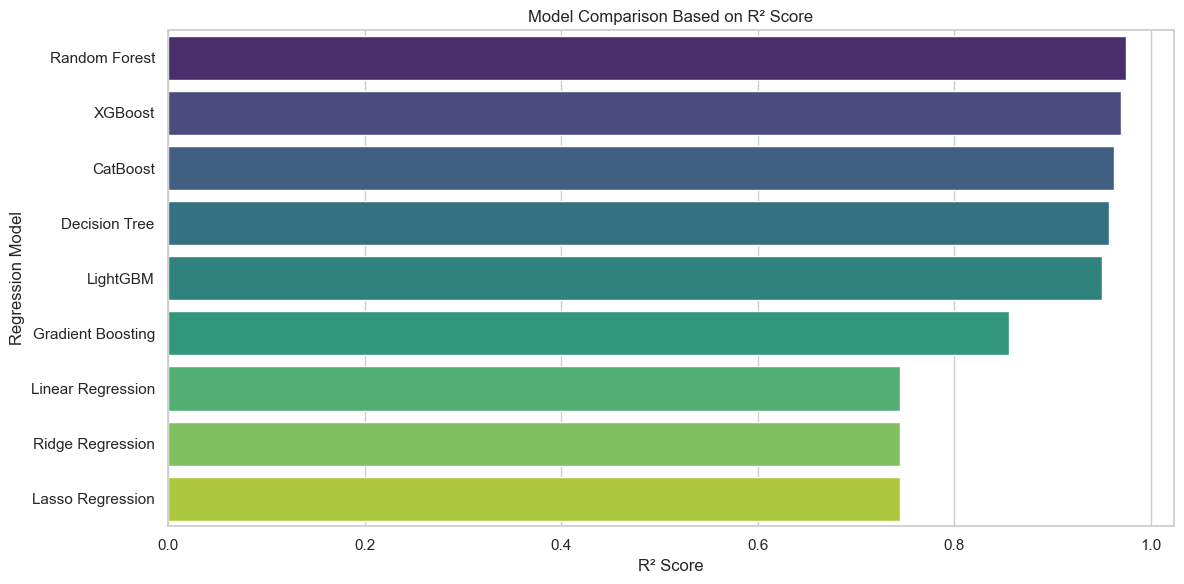

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='R² Score', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison Based on R² Score")
plt.xlabel("R² Score")
plt.ylabel("Regression Model")
plt.tight_layout()
plt.show()


📌 Linear Regression


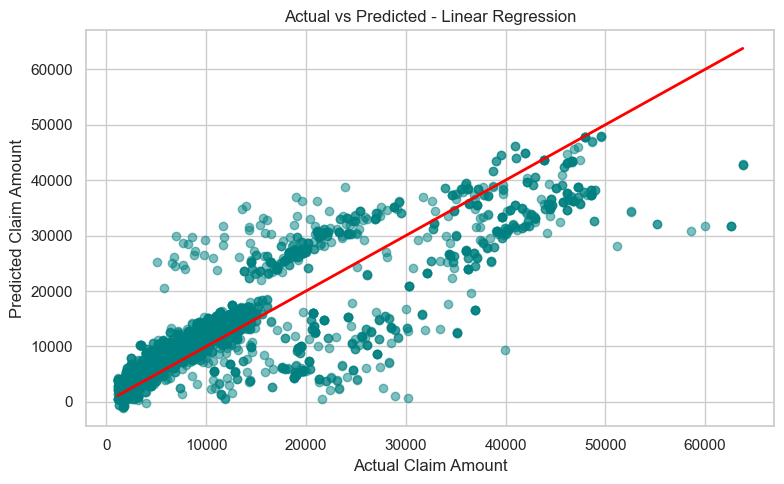


📌 Ridge Regression


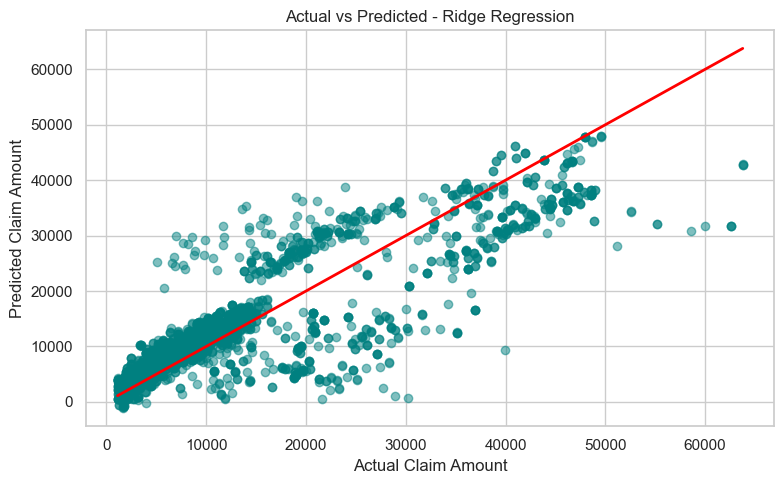


📌 Lasso Regression


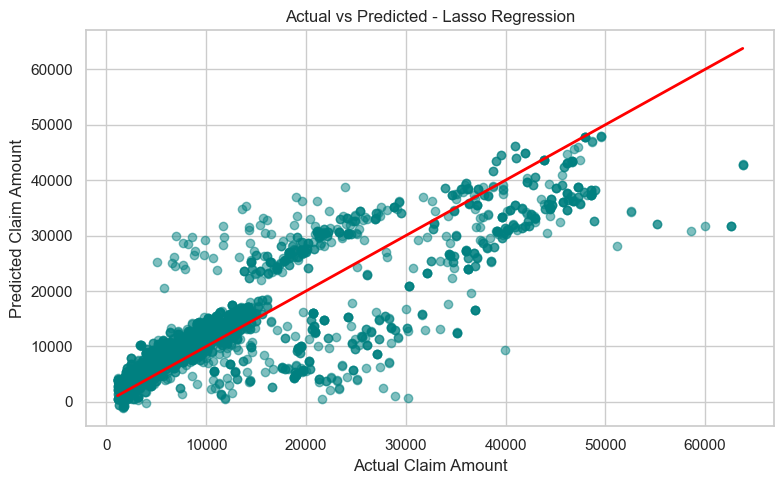


📌 Decision Tree


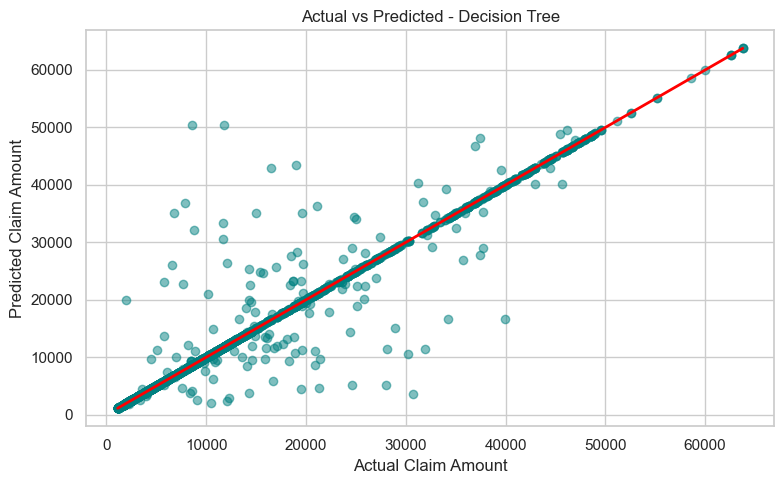


📌 Random Forest


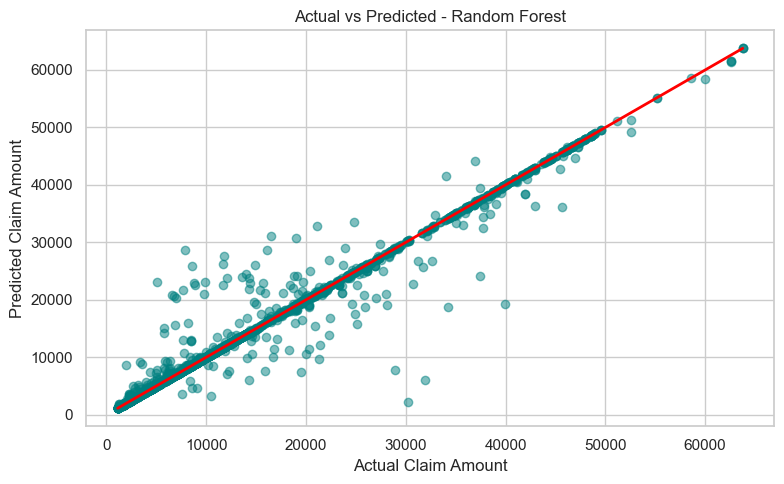


📌 Gradient Boosting


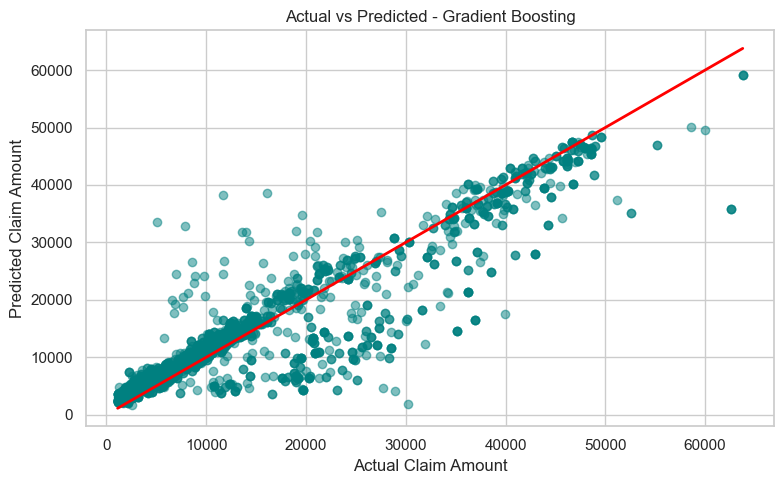


📌 XGBoost


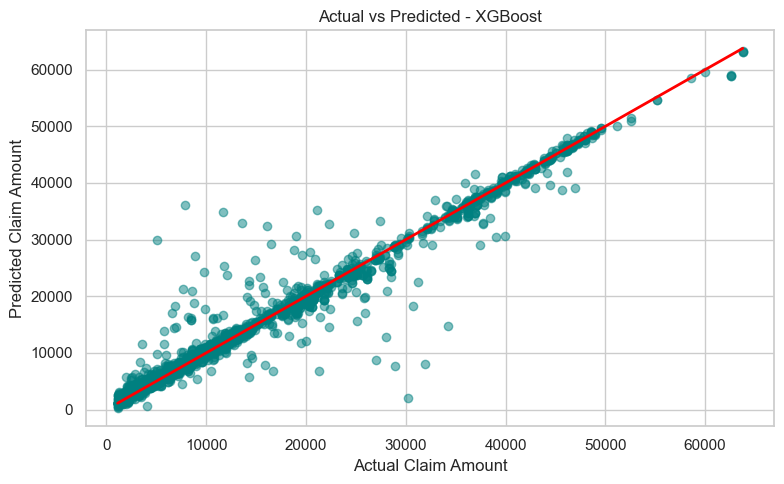


📌 LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 11123, number of used features: 12
[LightGBM] [Info] Start training from score 13400.786719


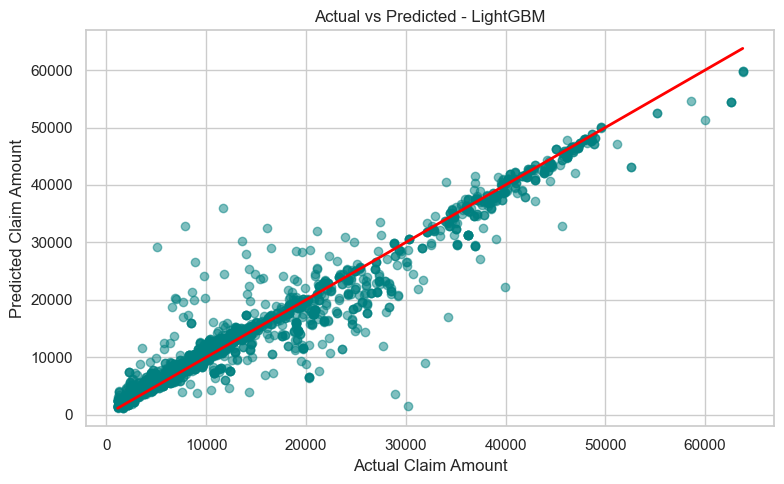


📌 CatBoost


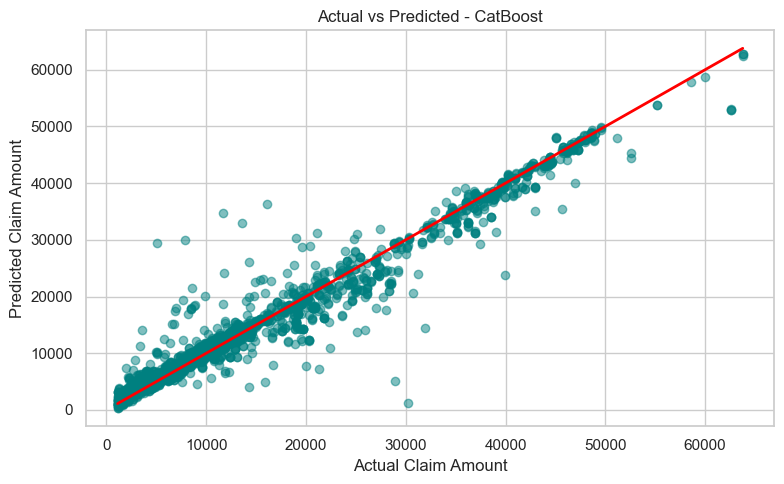

In [59]:
import matplotlib.pyplot as plt

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

# Loop through each model
for name, model in models.items():
    print(f"\n📌 {name}")
    
    # Use scaled data for linear models
    if "Regression" in name or name in ["Ridge Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Create a plot comparing actual vs predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal line
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Claim Amount')
    plt.ylabel('Predicted Claim Amount')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R² score:", grid.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score: 0.9589331936504489


In [61]:
best_model = grid.best_estimator_


In [62]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


C:\Users\duvvu\AppData\Local\Temp\ipykernel_22704\756252177.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




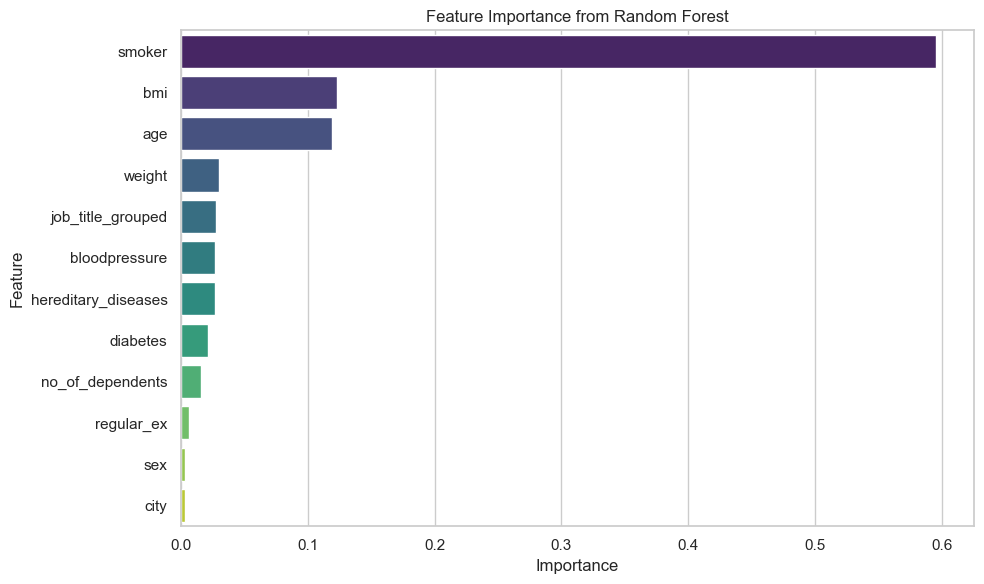

In [63]:
importances = grid.best_estimator_.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


In [64]:
best_model = grid.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Tuned RF - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


Final Tuned RF - MAE: 420.76, RMSE: 1965.60, R²: 0.9742


c:\Users\duvvu\projects\Insurance_Claim_Prediction\health\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



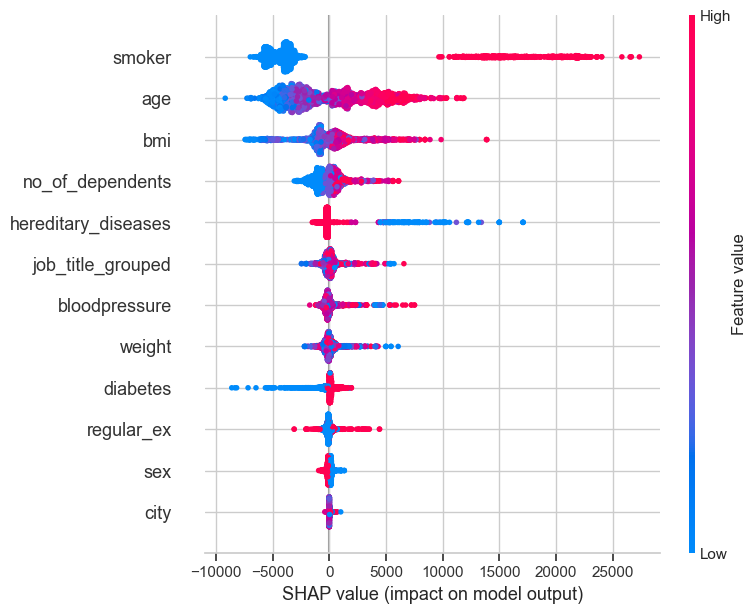

In [65]:
import shap

# Create explainer
explainer = shap.TreeExplainer(best_model)  # or just use your rf model
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)


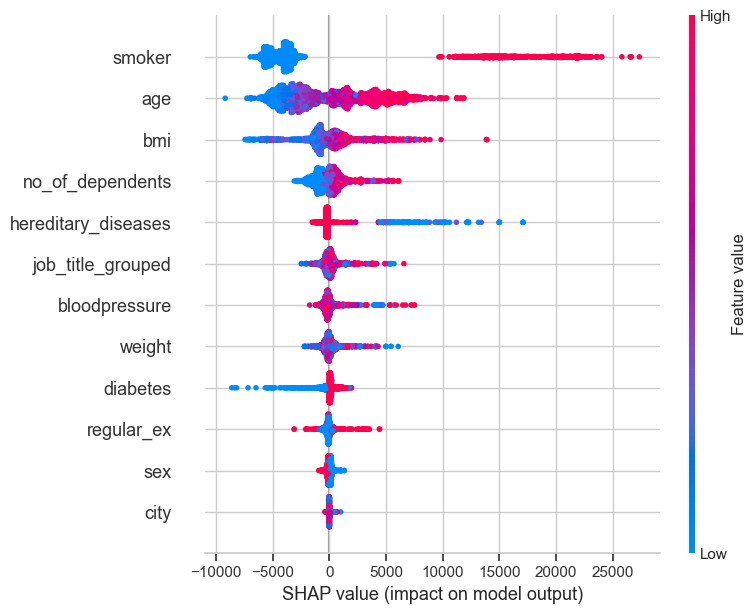

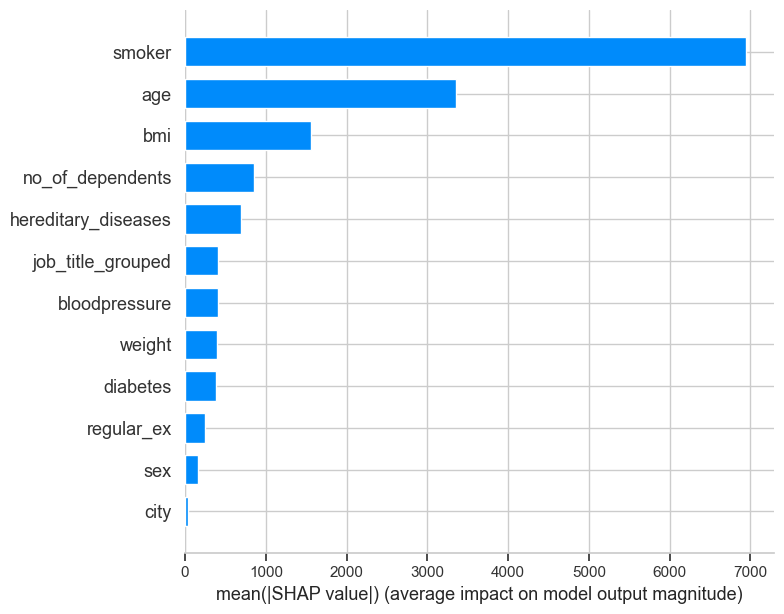

In [66]:
import shap

# Step 1: Initialize the explainer and get SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Step 2: Summary plot (global view)
shap.summary_plot(shap_values, X_test)

# Step 3: Bar plot (mean absolute SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Step 4: Force plot for a single prediction
shap.initjs()

# ✅ Handle expected_value safely (whether it's scalar or list)
expected_value = explainer.expected_value
if isinstance(expected_value, (list, np.ndarray)):
    expected_value = expected_value[0]

# ✅ Now the force plot will work safely
shap.force_plot(expected_value, shap_values[0], X_test.iloc[0])


In [67]:
import shap
shap.initjs()

# For single-output regression, expected_value might be a float or list with one element
expected_value = explainer.expected_value
if isinstance(expected_value, list) or isinstance(expected_value, np.ndarray):
    expected_value = expected_value[0]

# Plot the force plot for the first test instance
shap.force_plot(expected_value, shap_values[0], X_test.iloc[0])


In [68]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler (if used)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [69]:
X.to_csv("X_features.csv", index=False)
